---
title: "Tutorial seaborn (matplotlib) para visualização de dados"
date: 2023-08-20
comments: true
description: "eda"
categories: [datascience]
tags: ["python", "tips", "programming", "statistics"]
toc: true
blogged: "blog"
type: "post"
featured: false
thumbnail: "images/seaborn_matplot.png"
---


# Visualização de dados usando python - seaborn

+ O que é
+ Breve comparação com matplotlib
+ Instalação
+ Importa libraries
+ Importa datasets
+ Análise exploratória com uso "exclusivo" do seaborn
+ Análise exploratória com uso do seaborn + matplotlib
+ Aplicação em dados reais




+ Referências

## O que é

Obs: Esse tutorial foi feito com base principalmente na documentação do seaborn, além de outras fontes que costumo usar no dia-dia (ver referências). Familiarize-se com a documentação, ela é muito rica e lhe ajudará em muitas das tarefas no início.

> Cheque sempre a [documentação da library](https://seaborn.pydata.org/index.html)

**Seaborn** é citado como uma library que, sendo construída na base do matplotlib, tem como alguns de seus objetivos ser uma importante **ferramenta de visualização estatística**, com uma **interface um pouco mais amigável** no uso.

Acredito que tudo que o seaborn faz, matplotlib também faz. Porém em algumas situações o seaborn oferece uma escrita mais leve, intuitiva(?) e com certa flexibilidade. Para quem veio do R, por exemplo, costuma fazer mais sentido no início do que já se deparar com o matplotlib.

A seção introdutória da documentação do seaborn traz:

> Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

que por sua vez quer dizer:

> Seaborn é uma library para fazer gráficos estatísticos em Python. É construída sobre o matplotlib e possui forte integração com a estrutura de dados do pandas.

 A documentação ainda traz que essa library funciona de maneira **orientada ao dataset** , e por meio de sua API declarativa, o usuário consegue focar mais no significado dos diferentes elementos do seu plot, ao invés de *como eles funcionam*.

 Outros pontos interessantes sobre a library:

 + apelo visual (plots considerados mais bonitos)
 
 + menos código
 
 + variedade de temas e paletas de cores customizáveis
 
 + visualizações *multi-plot* (ex: grids) de maneira simples, facilitando exploratória
 
 + permite análises estatísticas 

## Breve comparação com matplotlib

Matplotlib é (provavelmente) a library de visualização mais usada do python.

Autores apontam que matplotlib é uma **low level plotting library**, enquanto o seaborn é uma **high level plotting library**. 

Isso (+-) quer dizer que o **matplotlib é muito flexível**, e você pode construir provavelmente qualquer coisa que imaginar. Porém isso com certeza demandará **mais linhas de código** e lógica de programação em comparação com a opção high level, que para ser mais simples, faz abstrações de coisas mais complexas de serem atingidas. Portanto, a curva de aprendizado de uma library como o matplotlib é maior, ao menos no que se refere às suas capacidades (além de plots bem básicos).

O seaborn, sendo uma library high level, **simplifica muito da complexidade** do matplotlib, trazendo uma escrita **menos verbosa, mais intuitiva** para boa parte dos gráficos estatísticos, e ainda com foco especial no uso de dataframes como origem dos dados.

É claro que ambas possuem suas vantagens e desvantagens (nada é perfeito!, e as necessidades são diversas), mas talvez o cenário ideal venha da **combinação de uso dessas libraries**, entendendo que *seaborn é poderoso para exploratórias e gráficos estatísticos*, e o *matplotlib permite a criação de plots extremamente customizáveis* para os mais diversos contextos.

## Instalação

Alguns requisitos para replicar o que estou mostrando:

+ Python 3
  
+ Jupyter notebook (não completamente necessário, mas interessante para relatórios)

+ numpy
  
+ pandas
  
+ matplotlib
  
+ seaborn

Sugestão: você pode criar uma pasta para o tutorial (ex: ./tutorial_seaborn/) e colocar notebooks, datasets utilizados lá. Abrir o vscode (ou ide de sua preferência) já nessa pasta, ativar o virtual environment de sua escolha, e centralizar todas as atividades do tutorial por lá.

Obs1: A escolha pelo uso de anaconda ou pip é sua, ambas são boas opções, escolha a que se sente mais confortável para trabalhar.

Obs2: Caso você ainda não tenha o seaborn instalado, poderá fazer por meio de uma das seguintes maneiras:

> pip install seaborn

ou

> conda install seaborn

## Importa libraries

Vamos importar as libraries instaladas, que permitem mais flexibilidade na visualização, além de importação e estruturação de datasets usados.

Abaixo, as libraries estão sendo chamadas pelos seus *aliases* mais comuns.

Numpy e pandas para trabalharmos com os datasets, caso necessário, e matplotlib porque esse é a base do seaborn e permitirá uma mais ampla customização dos plots, caso desejado.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy # necessário para algumas funções estatísticas

Já inicio mostrando um atributo bem interessante, os *styles* do matplotlib.

O seaborn também tem estilos (vistos mais a diante), mas é interessante notar nas opções disponíveis, que há alguns estilos disponíveis do próprio seaborn também. Cheque essa [página](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) e teste qual estilo lhe agrada ou é mais adequado ao seu contexto.

Ao setar o uso para determinado estilo, todos os gráficos daquele notebook, por exemplo, seguirão aquele estilo. É possível sobrepor certas características, caso desejado, mas todos terão por padrão aquele visual.

In [2]:
# Checar os estilos dispoíveis
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
style.use('fivethirtyeight') # Gosto do visual desse estilo
# style.use('ggplot2')
# style.use('seaborn-v0_8-colorblind') # visando acessibilidade

## Datasets

O seaborn já conta com uma série de datasets com origem em seus repositório online. Para início do tutorial, alguns de seus datasets serão utilizados aqui pois têm um tamanho reduzido com diferentes tipos de variáveis e pouca (ou nenhuma) necessidade de tratamento, o que torna o treino de visualização e análise exploratória mais prático.

Obs: Para carregar o dataset, você precisa estar conectada com a internet.

Um pouco mais de contexto sobre os datasets pode ser encontrado [aqui](https://github.com/mwaskom/seaborn-data)

In [4]:
# Para checar os nomes dos datasets disponíveis
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
# Após escolher o dataset, carregá-los
geyser = sns.load_dataset('geyser')
planets = sns.load_dataset('planets')
penguins = sns.load_dataset('penguins')

In [6]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Em qualquer análise, entender do contexto do negócio, do problema, é muito importante para que possamos direcionar as análises de maneira mais eficiente, e trazer insights úteis.

Sobre o dataset *planets*, que é um pouco menos usado, uma breve visão sobre suas variáveis:

+ method: aponta como o planeta foi descoberto

+ orbital_period: quanto tempo leva para o planeta completa um ciclo de rotação. Há NaNs pois para certos planetas é uma informação ainda pouco clara quanto à sua determinação

+ mass: massa relativa do exoplaneta

+ distance: distância do exoplaneta em anos-luz da Terra.
mass — relative weight of the exoplanet

+ year: ano de descoberta do exoplaneta

Obs: A origem do dataset pode ser encontrada nessa [página](https://exoplanets.nasa.gov/discovery/exoplanet-catalog/)

O dataset *penguins* é mais comum de encontrarmos exemplos na internet, e é como se fosse uma versão do famoso *iris*. Em resumo, um dataset multivariado, com variáveis categóricas e numéricas que identificam características de algumas espécies de pinguins.

O significado das variáveis de *penguins* é mais fácil do que de *planets*, portanto em resumo, no dataset dos pinguins podemos encontrar as variáveis categóricas: espećie, local (Ilha), sexo e as variáveis numéricas referentes à medições de parte do corpo do animal (bico, nadadeira, peso corporal). Mais informações sobre esse dataset podem ser encontradas [aqui]( https://github.com/allisonhorst/palmerpenguins)



### Uso "exclusivo" do seaborn

Obs: O "exclusivo" refere-se a uma breve reflexão sobre se de fato usamos somente o seaborn. Mesmo que utilizemos um simples *sns.scatterplot()* e mais nada, não estamos apenas usando o seaborn pois como já mostrado anteriormente, **tudo foi feito sobre o matplotlib**. É apenas uma maneira de diferenciar a chamada **direta** de funções do matplotlib - que como será mostrado, na medida em que você se aventura nas customizações, fica até difícil não utilizar essa library diretamente.

Utilizarei o dataset penguins, devido à sua versatilidade.

Além dos gráficos para visualização, também há **algumas funções** simples para auxiliar na **análise exploratória e interpretação** dos dados. Isso para simular da maneira mais real possível como fazemos esse tipo de atividade no dia-dia.

In [7]:
# Checar variáveis
penguins.info()
# Aqui já podemos ver que há algumas observações faltantes em algumas variáveis (mas bem pouco) 
# e o tipo de variável, como string e numérica.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [9]:
# Uma breve descrição estatística
penguins.describe() 
# é automaticamente feito para as variáveis numéricas, e ignorando os NaNs

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

#### Uma Visão geral da estrutura do *seaborn*:

Como apontado na própria documentação, a maior parte dos plots disponíveis dessa library podem ser classificados da seguinte maneira (para uma visão geral que facilite procurar o que você precisa):

+ **Plots relacionais**: *replot* - Como o nome já diz, são os gráficos que têm como foco a relação bivariada, e os principais representantes são: *scatterplot()* e *lineplot()*

+ **Plots para distribuições**: *displot* - Aqui o objetivo é avaliar as distribuições dos dados, e há opções interessantes: *histplot()*, *kdeplot()*, *ecdfplot()* e *rugplot()*

+ **Plots para dados categóricos**: *catplot* - Nessa "categoria", a library oferece muitas opções para a visualização de variáveis numéricas em função de variáveis categóricas (e níveis, caso haja): *stripplot()*, *swarmplot()*, *boxplot()*, *violinplot()*, *pointplot()*, *barplot()*

Ainda há os gráficos que permitem a visualização de **regressão**, os *regplot()* e *lmplot()*; gráficos que permitem a visualização de **múltiplos plots** em grids, com origem nas classes *FacetGrid()* e *PairGrid()* e ainda alguns gráficos para visão de **múltiplas relações**, como *pairplot()*, *heatmap()* e o *clustermap()*.

Para todos esses tipos de gráficos, e algumas outras funcionalidades, o seaborn disponibiliza APIs de fácil entendimento e uso. Todos esses tipos de gráficos citados acima serão vistos a seguir.

Um ponto interessante, mas que talvez de início seja muita informação para assimilar (e não impede o uso caso ainda não esteja claro para você), é como o seaborn trabalha com as *plotting functions*, por meio de diferentes interfaces.

O *seaborn* traz a existência das interfaces e suas funções em *figure-level* e *axes-level*. De acordo com a documentação, as *axes-level functions* são construídas em um objeto *matplotlib.pyplot.Axes* (e que é inclusive o valor de retorno da função). De acordo com a lista apresentada acima, scatterplot(), lineplot(), histplot(), stripplot() e os demais, estão nessa categoria.

Já as *figure-level functions*, consideradas *higher-level* quando comparadas às *axes-level*, seriam os relplot(), displot() e catplot(). Eles já têm um comportamento padrão (ex: o padrão de displot é o histograma, mas podemos utilizar o argumento kind='kde' para um resultado igual ao do *axes-level function* kdeplot()). Há algumas diferenças entre as *figure-level* e *axes-level* functions com relação a certos argumentos, mas como a própria documentação aponta, em termos de resultados finais, são **funções similares para tarefas similares**.

Há bem mais conteúdo nesse contexto, porém de início, acredito que seja demais, e possa desanimar alguém do aprendizado. O mais importante creio que fica no sentido de entender que por conta dessas particularidades, há mais de uma maneira de gerarmos o mesmo plot, e que na realidade, não existe de fato o "usar apenas seaborn e não matplotlib", já que o primeiro foi feito com base nesse último. As possibilidades de customização, especialmente quando utiliza-se o matplotlib, são imensas, e não conseguimos ter a noção de todas as possibilidades, até porque muitas serão conhecidas apenas quando surgir alguma necessidade específica.

Mas isso resume o porque de, ao falar de seaborn, temos também que falar sobre matplotlib. E que ambos se complementam muito bem.

#### Gráficos relacionais: bivariados 

Nessa categoria, o objetivo é a avaliação da relação entre duas variáveis. É um passo fundamental em qualquer análise exploratória, pois permite a identificação de padrões e tendências em uma relação bivariada.

Veja a seguir duas maneiras (figure-level e axis-level) de se atingir o mesmo tipo de gráfico relacional, do tipo scatterplot.

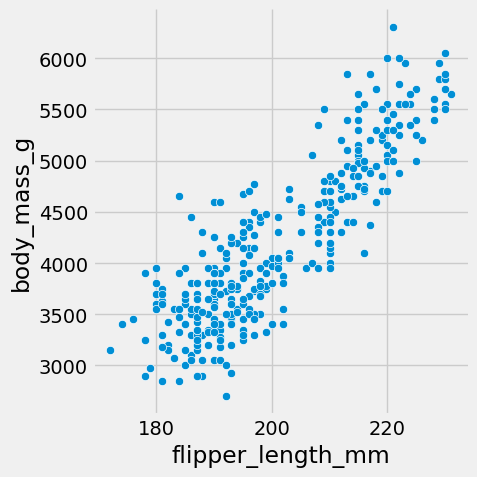

In [10]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g')
# obs: seu visual será um pouco diferente de acordo com o style escolhido lá no início
# perceba o <seaborn.axisgrid.FacetGrid at ....>  e que será diferente ao usarmos uma axis-level function

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

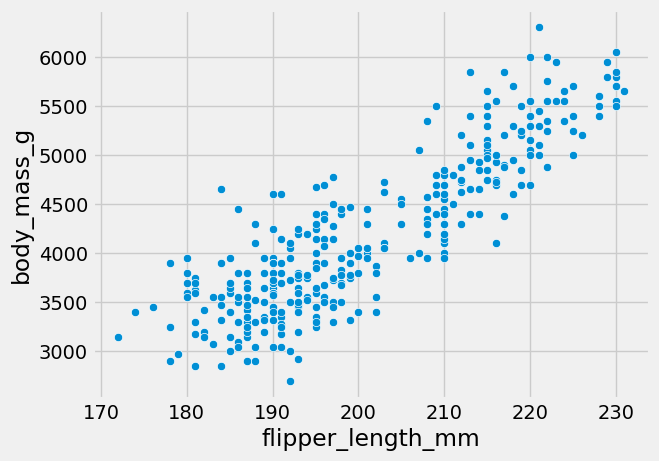

In [11]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g')
# veja que aqui você tem um <Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>
# para suprimir esse tipo de output, pode apenas colocar um ; ao final da última linha de código
# o uso do plt.show() ao final, como veremos mais pra frente, também apresenta esse tipo de resultado

Para mais possibilidades, customização, é importante consultar a documentação para se familiarizar com todos os argumentos.

Alguns exemplos a seguir:

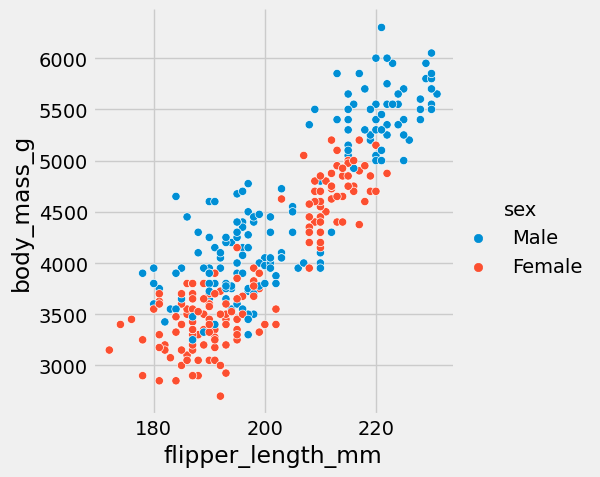

In [12]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='sex');


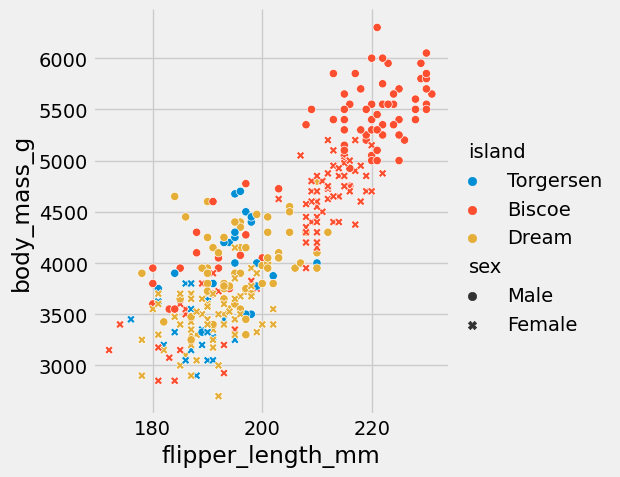

In [13]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='island', style='sex');

A visualização já fica um pouco mais confusa, mas dá para perceber o poder oferecido pela library com bem pouco código.

Perceba também que a paleta de cores usada é de acordo com o estilo escolhido lá no início, mas você pode mudar isso usando o argumento palette.

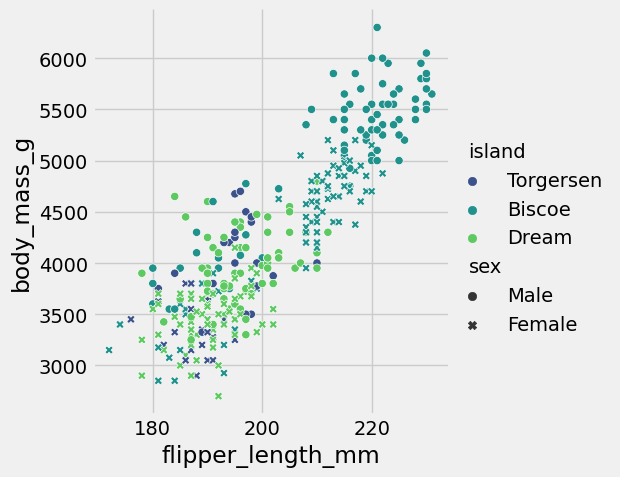

In [14]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g',
            hue='island', palette='viridis', style='sex');

A seguir, outro importante tipo de gráfico relacional, o que utiliza linhas. Seguindo a mesma lógica anterior, isso pode ser atingido ao usarmos o figure-level *replot()*, ou o axis-level *lineplot()*.

Esse é um tipo de gráfico relacional que faz muito sentido quando temos uma **variável relacionada a tempo**, pois aí ficam mais evidentes as mudanças de uma variável quantitativa em função do tempo. 

Nesse dataset não há uma variável relacionada a tempo, e isso pode já ser um exercício da sua análise exploratória: faz sentido esse tipo de visualização/interpretação? Pode ser que não faça. 

Aqui a ideia foi entender se há mudanças no peso corporal dos pinguins em função do aumento do comprimento das nadadeiras.

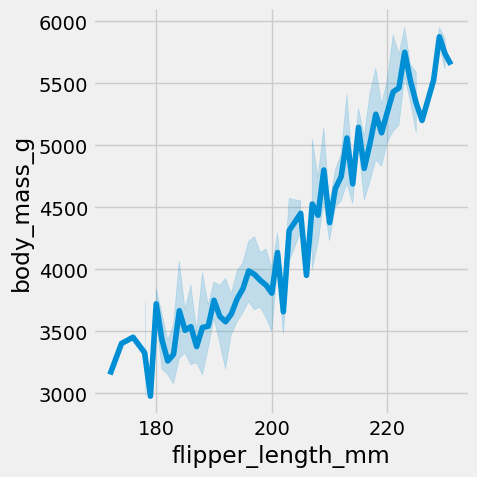

In [15]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='line');

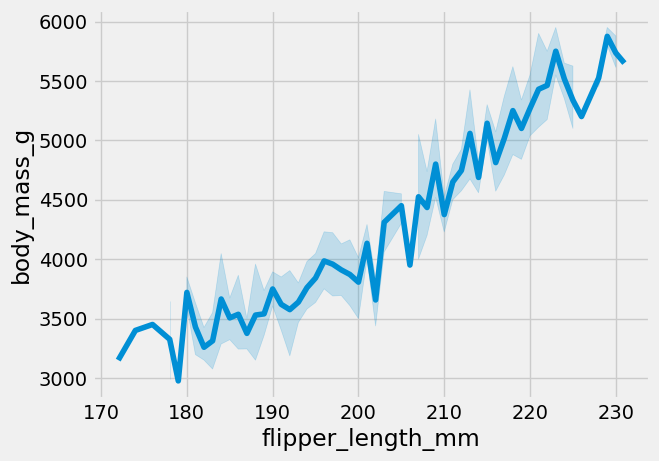

In [16]:
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g');

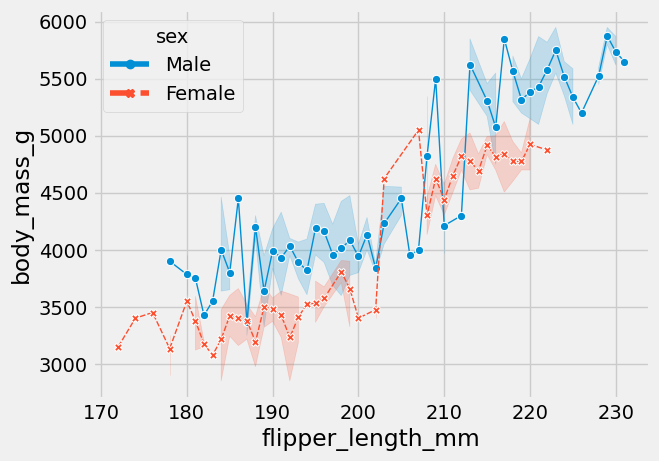

In [17]:
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g',
             hue='sex', style='sex', markers=True, lw=1);

O seaborn permite, em alguns tipos de gráficos, o uso de argumentos que trazem a visualização do tipo múltiplos plots (também veremos mais a frente as classes para esses tipos de gráficos). 

O uso do argumento "col" permite o uso de uma variável para dividir o plot pelos seus níveis. No contexto dos gráficos relacionais, temos de utilizar o figure-level relplot().

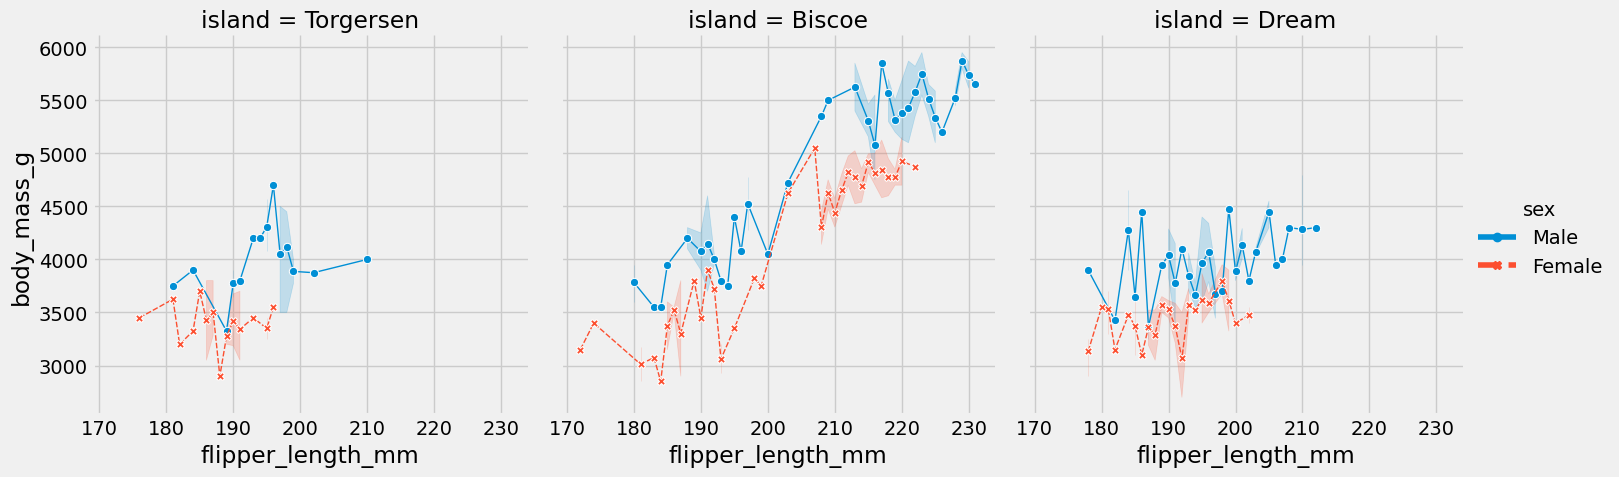

In [18]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='line',
             col='island', hue='sex', style='sex', markers=True, lw=1);

#### Gráficos para distribuições: univariados

Tanto quanto devemos entender a relação entre variáveis dos nossos dados, temos também de entender quais são as distribuições dessas variáveis. Um dos gráficos mais comuns para essa tarefa é o **histograma**.

Esse tipo de informação nos leva a, por exemplo, **decidir por determinados testes e análises estatísticas** que são recomendados (ou não) para aquela distribuição. Para análises mais rigorosas e formais, em geral a análise gráfica visual não é a única ferramenta em nossas mãos, mas certamente é um importante passo nesse processo.

Além disso, há muitas informações importantes que podemos extrair desse tipo de visualização. Além da própria distribuição, podemos identificar a tendência central, presença de outliers (não apenas nos boxplots conseguimos isso!), assimetria e curtose.


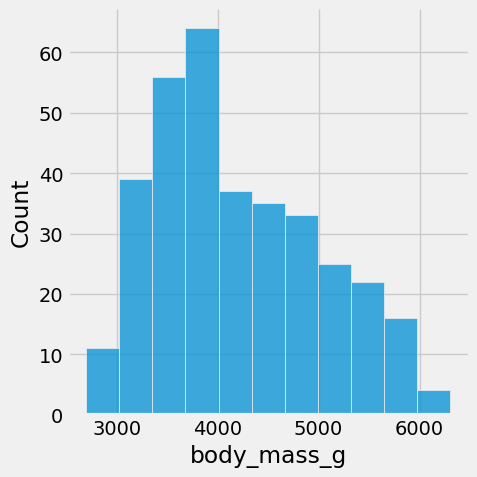

In [19]:
# Começando pela função de figure-level, que usa por padrão o histograma
sns.displot(penguins, x='body_mass_g');

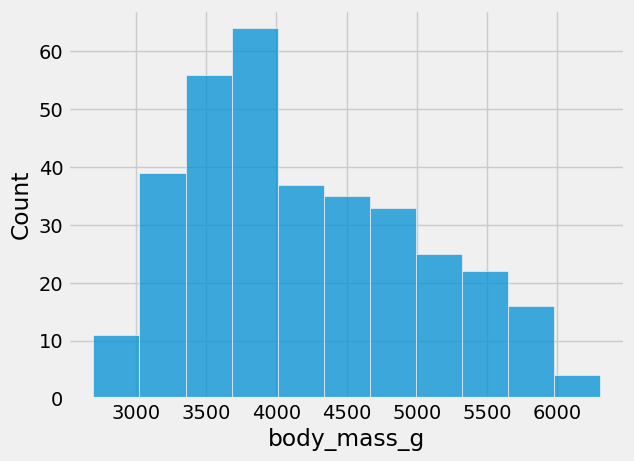

In [20]:
# atingindo o mesmo resultado usando a axis-level histplot
sns.histplot(penguins, x='body_mass_g');

Há muitos argumentos a serem explorados na construção desse tipo de gráfico.

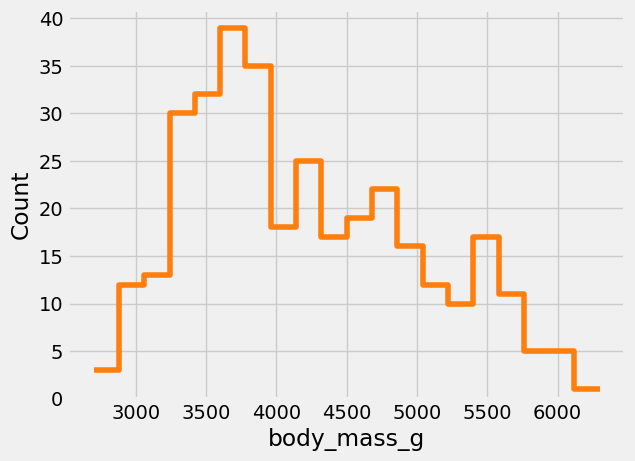

In [21]:
sns.histplot(penguins, x='body_mass_g', color='tab:orange', element='step',
             bins=20, fill=False);

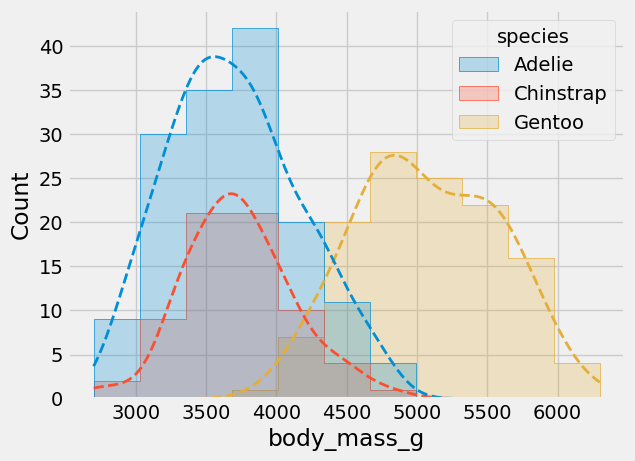

In [22]:
sns.histplot(penguins, x='body_mass_g', hue='species', element='step',
             kde=True, line_kws={'linestyle': 'dashed', 'linewidth': 2});

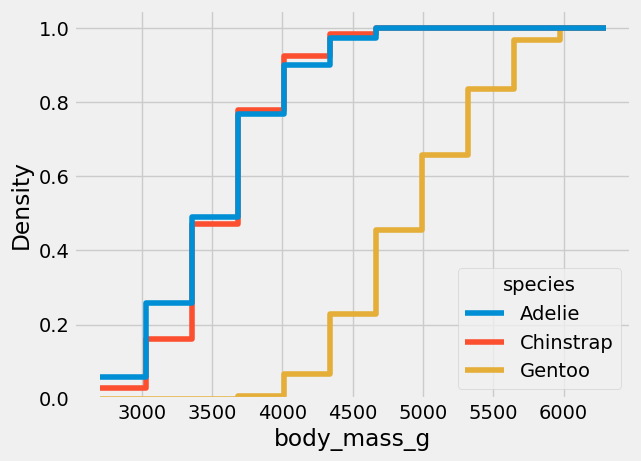

In [23]:
sns.histplot(penguins, x='body_mass_g', hue='species', element='step',
             fill=False, cumulative=True, stat='density', common_norm=False);

Os gráficos do tipo kde também são interessantes na visualização de distribuições. Se parecem muito com o histograma, mas têm um visual mais "suave". Cuidado para que a suavização não seja excessiva e acabe não representando muito bem os dados. Avaliá-lo sob diversos pontos de vista é um passo muito importante na análise exploratória.

> KDE significa *Kernel Density Estimation*, e diferentemente do histograma, não usa bins discretos na representação da distribuição - usa um kernel Gaussiano para suavizar a distribuição.

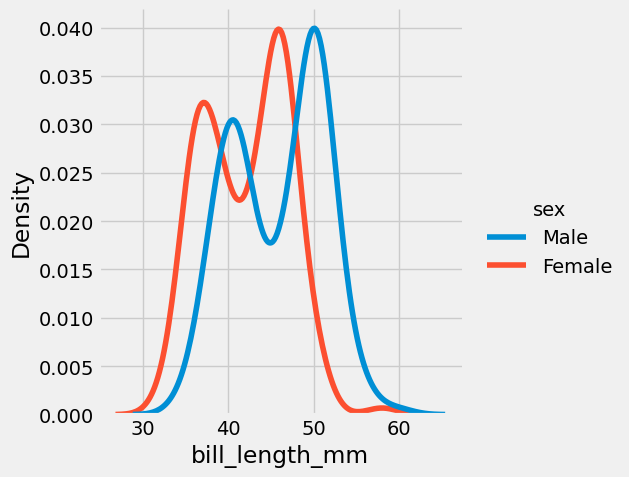

In [24]:
sns.displot(penguins, x='bill_length_mm', hue='sex', kind='kde');

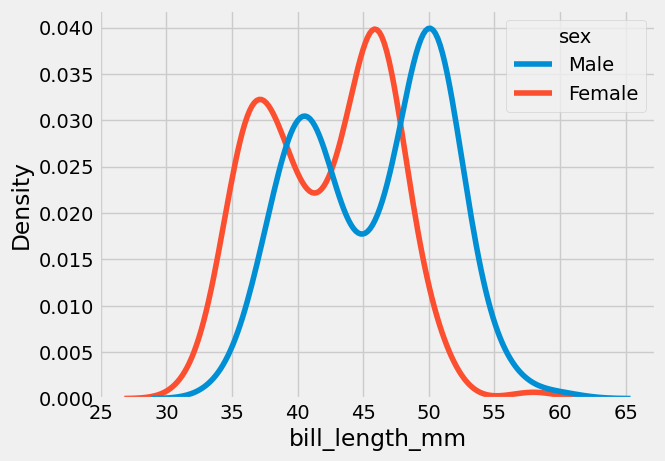

In [25]:
sns.kdeplot(data=penguins, x='bill_length_mm', hue='sex');

Assim como já mostrado anteriormente, você pode atingir o mesmo resultado por mais de interface da library (figure-level e axis-level), e há muitos argumentos para explorar e customizar suas visualizações.

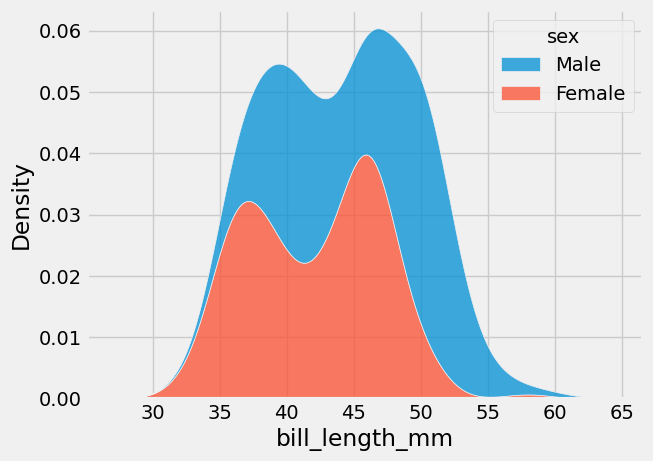

In [26]:
sns.kdeplot(data=penguins, x='bill_length_mm', hue='sex', multiple='stack');

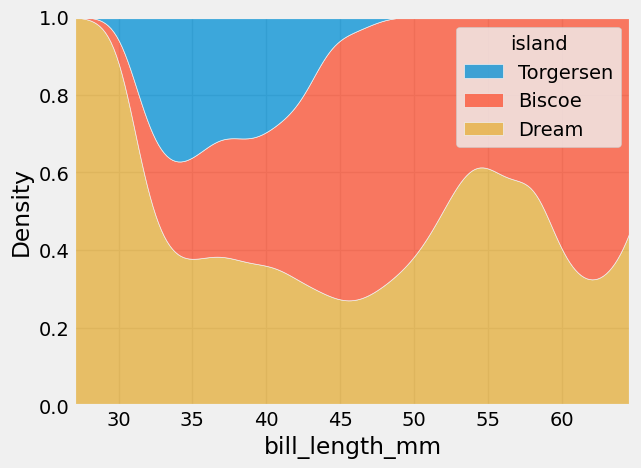

In [27]:
sns.kdeplot(data=penguins, x='bill_length_mm', hue='island', multiple='fill');

E até mesmo atingir novamente a densidade acumulada, como mostrado anteriormente, mas com um visual de maior suavização.

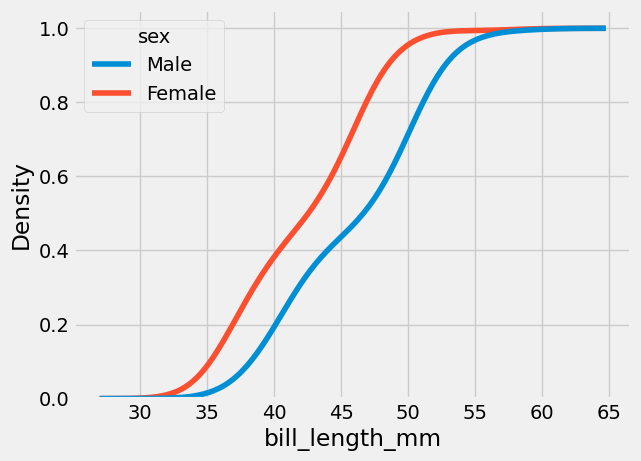

In [28]:
sns.kdeplot(
    data=penguins, x='bill_length_mm', hue='sex',
    cumulative=True, common_norm=False, common_grid=True);

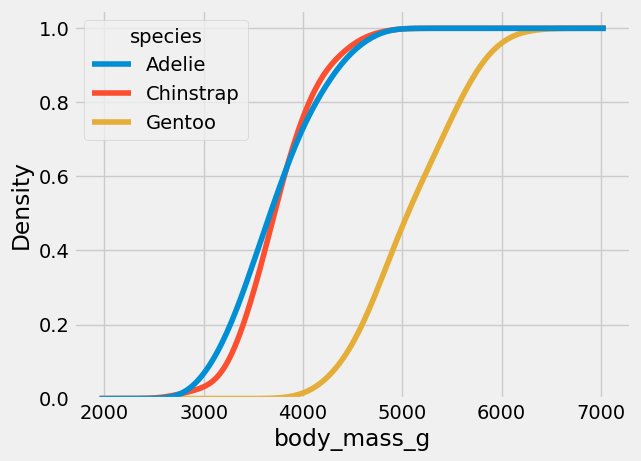

In [29]:
sns.kdeplot(
    data=penguins, x='body_mass_g', hue='species',
    cumulative=True, common_norm=False, common_grid=True);

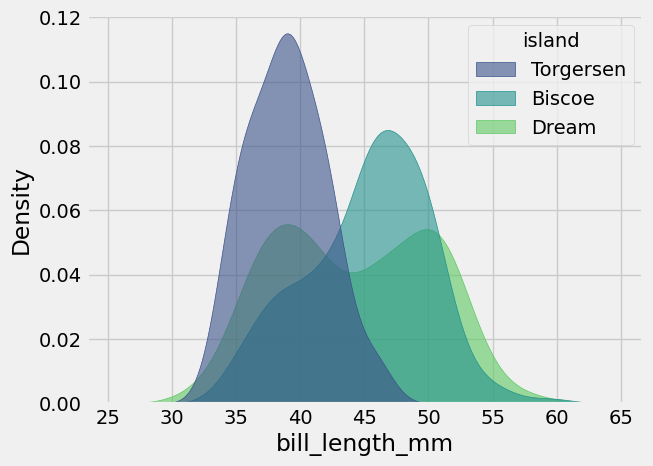

In [30]:
sns.kdeplot(data=penguins, x='bill_length_mm', hue='island',
   fill=True, common_norm=False, palette="viridis",
   alpha=.6, linewidth=.5);

Com relação à bimodalidade vista na variável bill_length_mm nos gráficos anteriores por sexo, perceba que agora fica mais claro que isso está concentrada em uma ilha, a ilha de Dream. A seguir vemos também que isso é mais presente em uma das espécies.

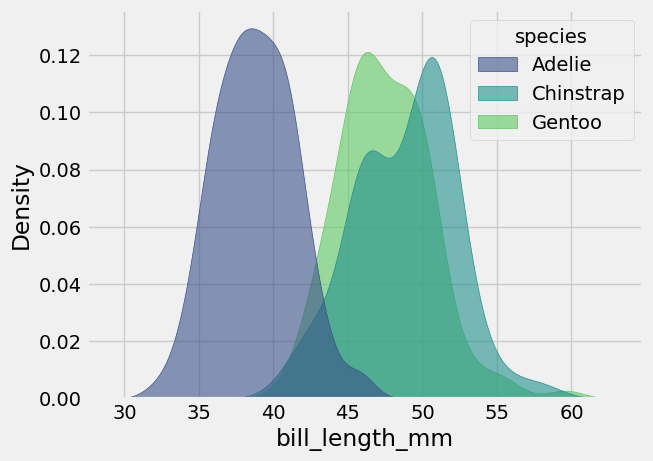

In [31]:
sns.kdeplot(data=penguins, x='bill_length_mm', hue='species',
   fill=True, common_norm=False, palette="viridis",
   alpha=.6, linewidth=0.5);

O gráficos de **ECDF** (*Empirical Cumulative Distribution Function*) é interessante, pois trabalha com uma curva que cresce a cada observação, e sua "altura" final representa a proporção de observações que têm um valor até o valor daquele ponto.

Nesse tipo de gráfico, a comparação entre distribuições fica um pouco mais clara do que com o uso de histogramas e curvas de kde.

Porém, nesse tipo de gráfico a bimodalidade que acabamos de identificar com o uso de histogramas e curvas de kde não fica tão perceptível. Por isso o uso de mais de um tipo de gráfico, cada um com suas diferentes características, é fundamental para uma ampla análise exploratória, especialmente quando você não tem muitas familiaridade com os dados.

Veja a seguir as maneiras figure-level e axis-level para a visualização de gráficos de ecdf.

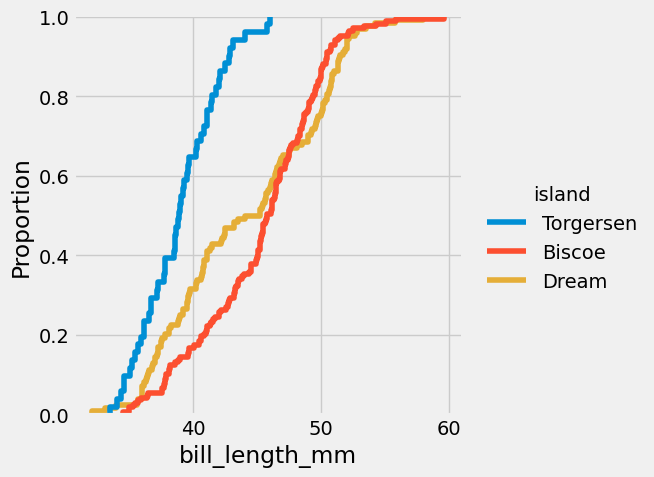

In [32]:
sns.displot(penguins, x='bill_length_mm', hue='island', kind='ecdf');

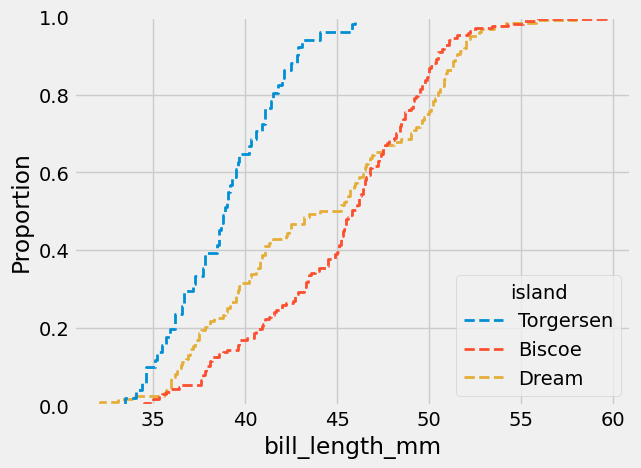

In [33]:
sns.ecdfplot(data=penguins, x='bill_length_mm', hue='island',
            linewidth= 2, linestyle='dashed');

Um outro tipo de gráfico para avaliar distribuições de maneira univariada, e bem pouco utilizado, é o chamado *rugplot*.

Esse tipo de gráfico também plota as distribuições marginais, mas utiliza "ticks" para isso nos eixos (x e/ou y).

O termo *rug* é porque ele acaba se parecendo com as bordas de um tapete mesmo.

Não é o tipo de gráfico imprescindível para uma análise, mas a presença dos "ticks" pode ajudar a entender/reforçar a ideia de maior presença/ausência e localização mais exata de observações em determinadas regiões de uma distribuição.

Aqui há alguns detalhes que se diferenciam um pouco dos 3 tipos de gráficos anteriores. Se estiver usando a lógica de figure-level, verá que não há o "kind=rug" como argumento, mas sim o booleano "rug=True".  

Porém, ao fazer apenas isso, no displot que fornece como padrão o histograma, o adicional dos "ticks" do *rugplot* darão uma aparência poluída, de difícil visualização, como a seguir:

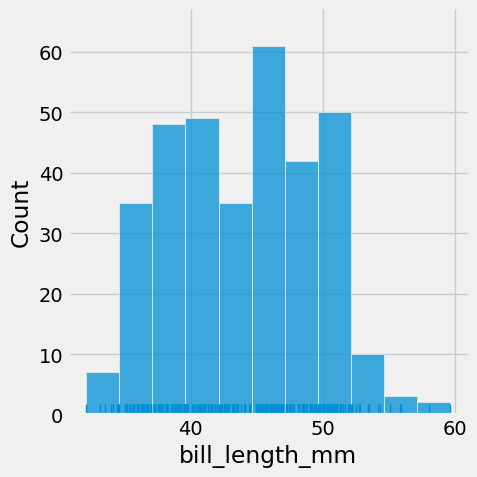

In [34]:
sns.displot(penguins, x='bill_length_mm', rug=True);

E é por isso que os exemplos da própria documentação utilizam a lógica do axis-level juntamente com algum tipo de gráfico que facilita a visualização, e sugere o seu uso como sendo **complementar** a esses outros tipos de gráficos.

Portanto, o uso desse tipo de gráfico, especificamente, é mais coerente apenas quando seguimos o uso da lógica de gráficos axis-level.

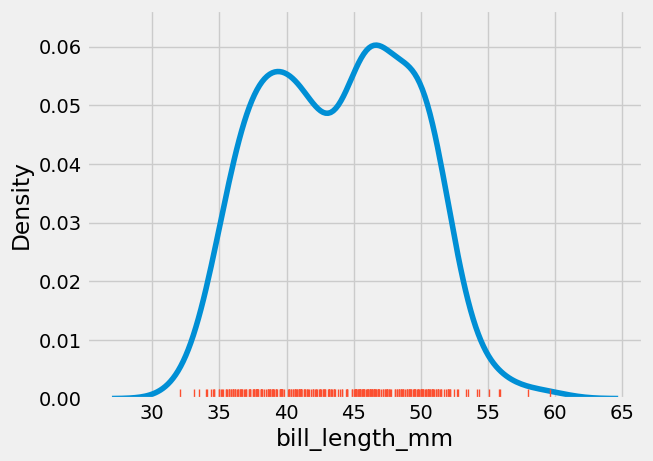

In [35]:
sns.kdeplot(data=penguins, x='bill_length_mm')
sns.rugplot(data=penguins, x='bill_length_mm');

#### Gráficos para distribuições: bivariados

Até agora foi vista a lógica do uso de gráficos para visualização de distribuição de apenas uma variável, ou *univariados* (exceto quando foi trazida também outra variável por meio de cores) e que também é a maneira mais comum de se avaliar distribuições. Porém é possível também visualizar distribuições de maneira **bivariada**, continuando com a mesma lógica simples e de pouco uso de código.

Da mesma maneira, conseguimos aqui usar a interface de figure-level ou de axis-level.

Os exemplos a seguir mostram o padrão do *distplot()*, que é o histograma, apesar do visual ser um pouco diferente de um histograma comum justamente por ser bivariado.

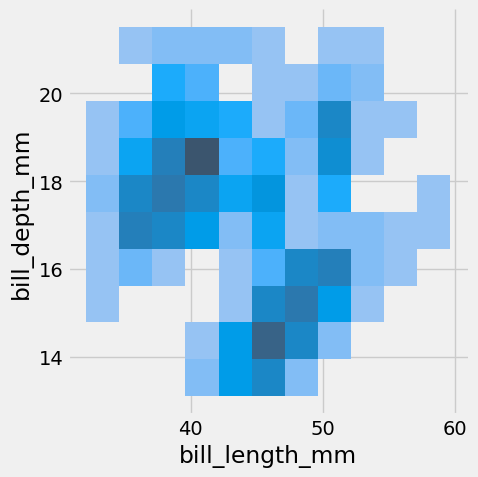

In [36]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm');

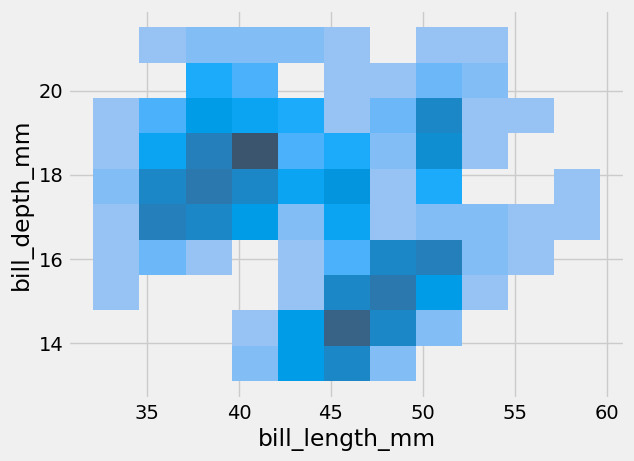

In [37]:
sns.histplot(penguins, x='bill_length_mm', y='bill_depth_mm');

Nesse tipo de gráfico, a interpretação deve ser feita entendendo que regiões com maior número de observações têm cor mais escura (nesse caso padrão, a escala de cores pode ser customizada), lembrando um pouco o resultado de quando usamos um *heatmap*. Podemos ainda trazer outra variável para a cor por meio de *hue*, como a seguir:

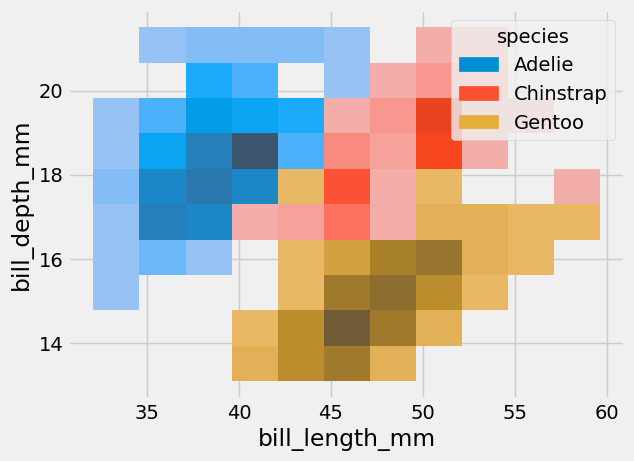

In [38]:
sns.histplot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

Veja que a visualização acima ficou um pouco confusa, e outros tipos de gráficos com certeza fariam melhor o trabalho. 
O uso de uma variável com menor número de níveis, como por exemplo sexo talvez fique melhor.

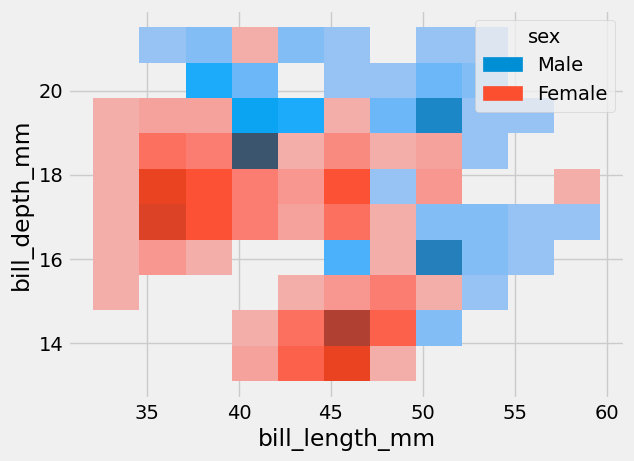

In [39]:
sns.histplot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='sex');

Já o uso da curva de kde, por exemplo, resulta numa visualização diferente, com o uso de **contornos**, e a interpretação pode não ser muito óbvia de início. A seguir novamente o uso de figure-level e axis-level para atingir os mesmos resultados.

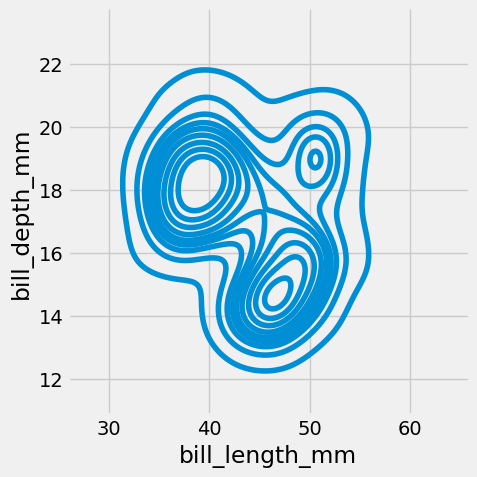

In [40]:
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde');

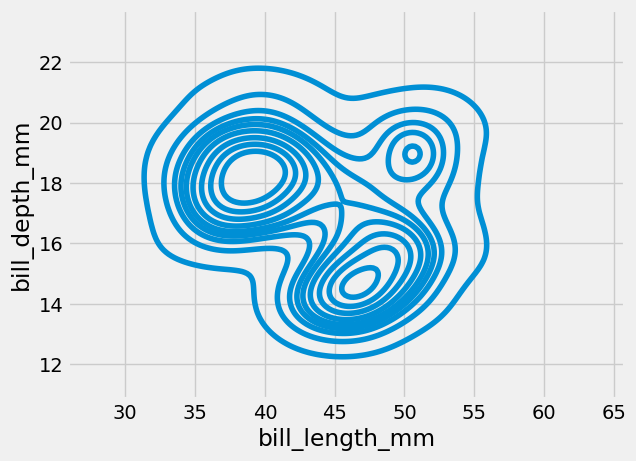

In [41]:
sns.kdeplot(penguins, x='bill_length_mm', y='bill_depth_mm');

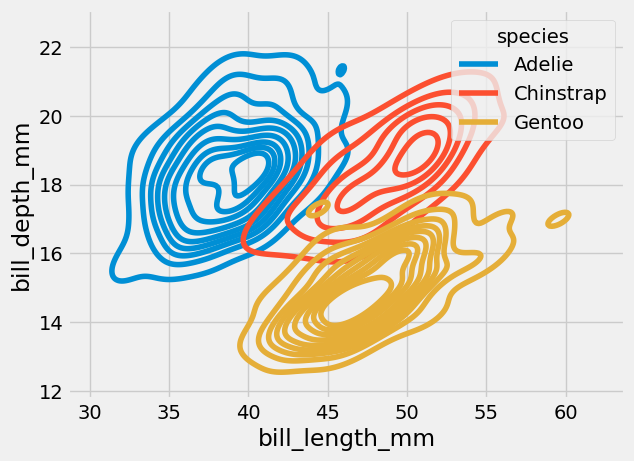

In [42]:
sns.kdeplot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

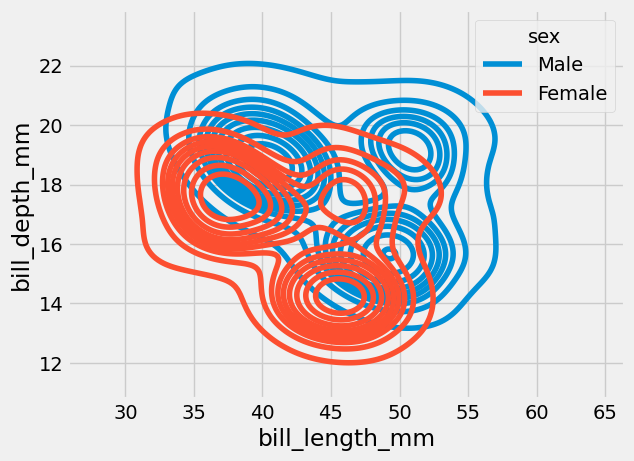

In [43]:
sns.kdeplot(penguins, x='bill_length_mm', y='bill_depth_mm', hue='sex');

Os dois gráficos anteriores apresentaram uma visualização um pouco melhor quando utilizando 3 variáveis, em relação ao gráfico padrão de histograma. Esse tipo de constatação acontece apenas quando já temos alguma familiaridade com os dados, os tipos de gráficos, e/ou uma análsie exploratória ampla está sendo feita.

O rugplot, visto anteriormente, parece ter um uso mais interessante nesse tipo de gráfico com relações bivariadas, como a seguir:

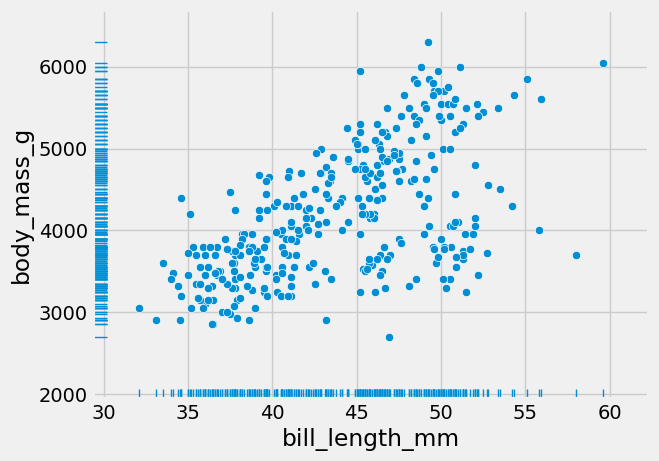

In [44]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g')
sns.rugplot(data=penguins, x='bill_length_mm', y='body_mass_g');

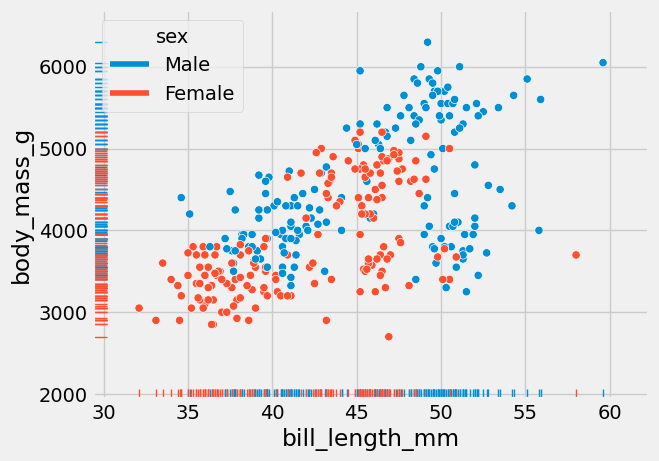

In [45]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='sex')
sns.rugplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='sex');

Uma observação: caso o desejado seja o histograma com o uso dos "ticks" do rugplot, que como visto anteriormente usando o *displot* a visualização fica prejudicada com toda a sobreposição, é possível usar o *histplot* com *rugplot* e outros argumentos que coloquem os "ticks" do lado de fora do gráfico, como a seguir:

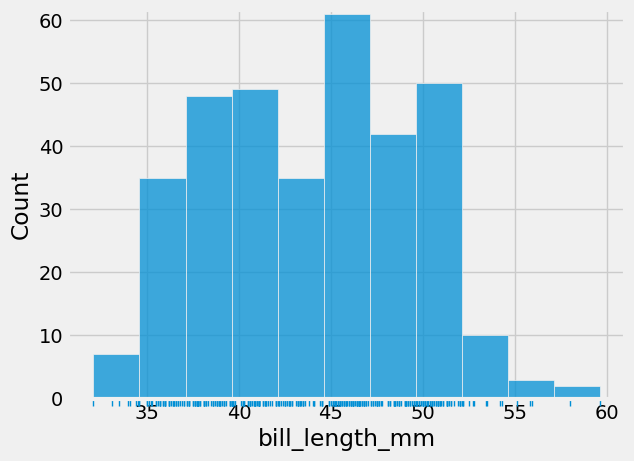

In [46]:
sns.histplot(penguins, x='bill_length_mm')
sns.rugplot(penguins, x='bill_length_mm', height=-.02, clip_on=False);

#### Gráficos para dados categóricos

Esse é o tipo de gráfico que precisamos quando uma das variáveis que queremos avaliar na relação uni ou bivariada é **categórica**.

Como nas categorias já apresentadas, o seaborn disponibiliza isso de maneira prática e usando pouco código. Aqui há também uma grande variedade de gráficos disponíveis, sendo os da interface axis-level: *stripplot*, *swarmplot*, *boxplot*, *violinplot*, *pointplot* e *barplot*. Há ainda a interface figure-level de gerar esse tipo de gráfico, que nesse caso é o *catplot*.

Nessa categoria, como muito bem detalhado na própria documentação da library, podemos ainda enxergar diferentes subcategorias desses gráficos, sendo elas: 

1. Scatterplots categóricos (*stripplot* e *swarmplot*);

2. Gráficos categóricos para distribuição (*boxplot*, *violinplot* e *boxenplot*);

3. Gráficos categóricos de estimativas (*pointplot*, *barplot*, *countplot*)

1. Scatterplots categóricos

Se você já tentou fazer um gráfico do tipo *scatter* para uma variável categórica usando apenas o matplotlib, provavelmente se deparou com o problema da sobreposição dos pontos, e ao procurar uma solução para isso, viu que em termos de código não seria algo muito trivial e sucinto de resolver.

Isso é facilmente resolvido na abordagem high-level do seaborn por esses tipos de gráficos por meio do uso do **jitter** dos pontos - esse é seu diferencial sobre um simples scatterplot.

Veja a seguir o uso mais básico nas interfaces figure-level e axis-level.

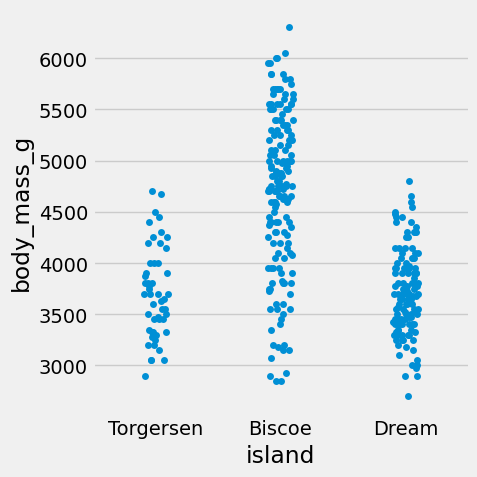

In [47]:
sns.catplot(data=penguins, x='island', y='body_mass_g');

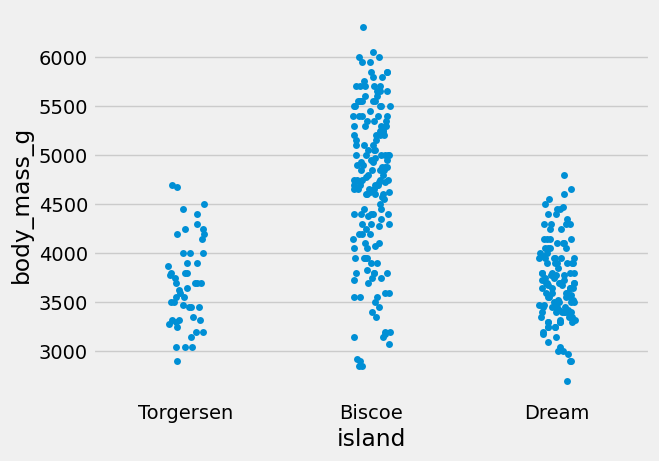

In [48]:
sns.stripplot(data=penguins, x='island', y='body_mass_g');

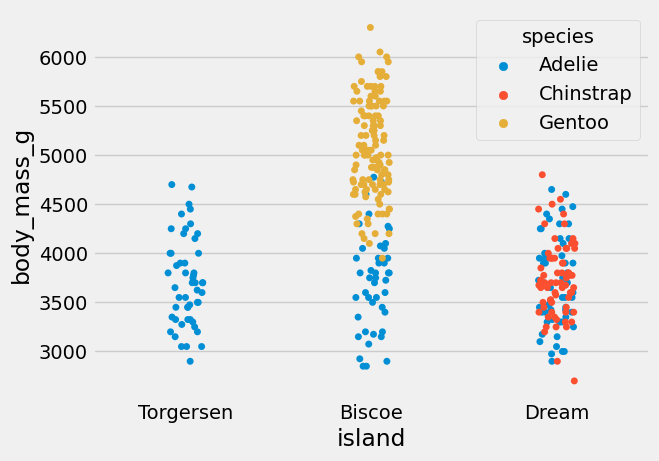

In [49]:
sns.stripplot(data=penguins, x='island', y='body_mass_g', hue='species');

Uma coisa interessante nessa API do seaborn, e mais eficiente do que no matplotlib (ou ao menos atingida com menos código) é quando temos uma variável numérica do tipo *int*, e queremos utilizá-la como variável categórica para uso da cor (*hue*). Isso é comum quando queremos visualizar o resultado de uma clusterização, por exemplo.

A seguir, crio um array para ser coluna do dataframe, gerando números aleatórios entre 1 e 5, e utilizá-la como esse tipo de variável, declarando uma palette categórica.

In [50]:
group = np.random.randint(5, size=len(penguins['species']))
penguins['group'] = group

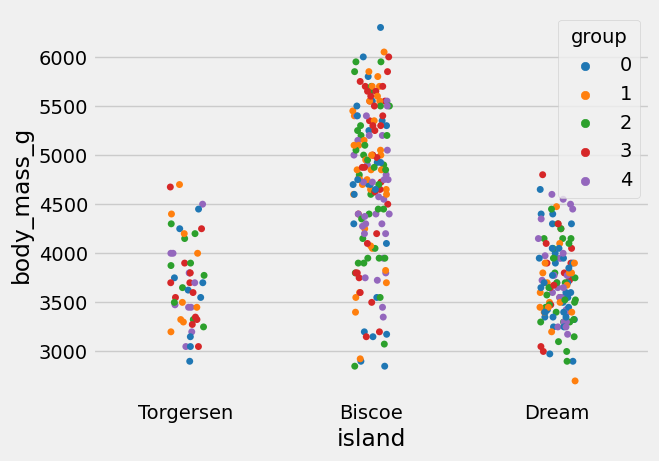

In [51]:
sns.stripplot(data=penguins, x='island', y='body_mass_g', hue='group', palette='tab10');

O argumento *dodge* também é interessante de ser explorado, dependendo da visualização, como a seguir, que para o uso de mais de uma variável categórica deixa o entendimento um pouco mais claro. Porém atenção, quando a variável categórica tiver muitos níveis, pode resultar em um gráfico de difícil visualização.

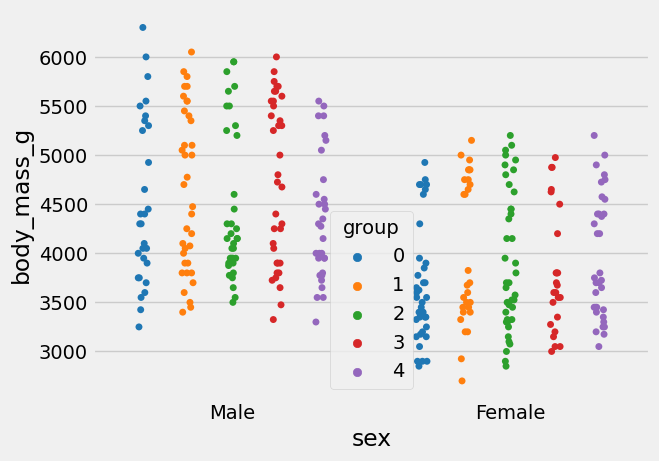

In [52]:
sns.stripplot(data=penguins.dropna(), x='sex', y='body_mass_g', hue='group', palette='tab10', dodge=True);

O *swarmplot* é similar ao *stripplot*, porém o diferencial aqui é que não há sobreposição alguma de pontos, o que facilita o entendimento da distribuição dos pontos em relação a um eixo categórico. 

Contudo, esse tipo de gráfico não comporta bem datasets grandes, nos quais a sobreposição seria quase que inevitável, nesse caso é melhor partir para o uso do *stripplot* ou até mesmo o *scatterplot*, com uso de alguns ajustes estéticos.

Assim como o *stripplot*, você pode usá-lo para visualização de apenas uma variável (quantitativa), ou na forma bivariada, utilizando uma variável categórica.

A seguir, o uso de figure-level e axis-level para atingir o mesmo tipo de visualização.

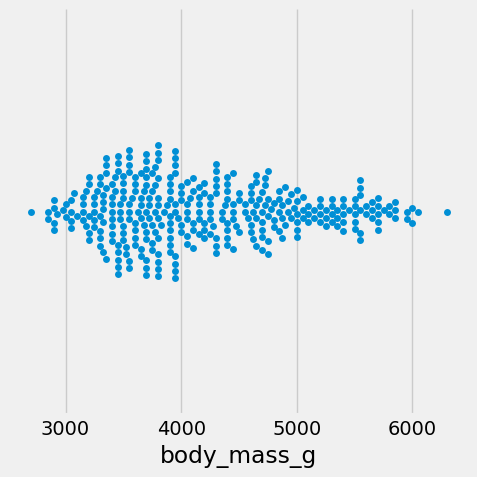

In [53]:
sns.catplot(data=penguins, x='body_mass_g', kind='swarm');

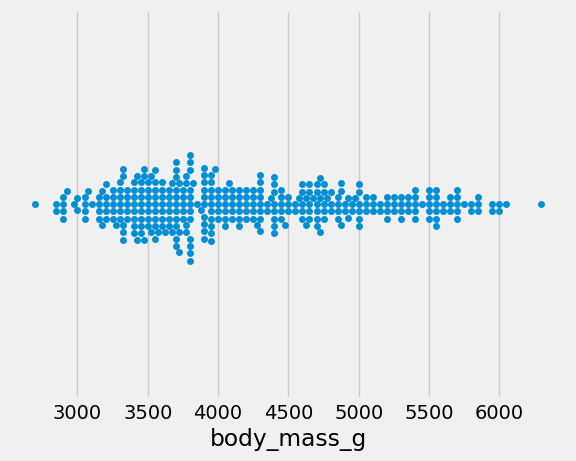

In [54]:
sns.swarmplot(data=penguins, x='body_mass_g');

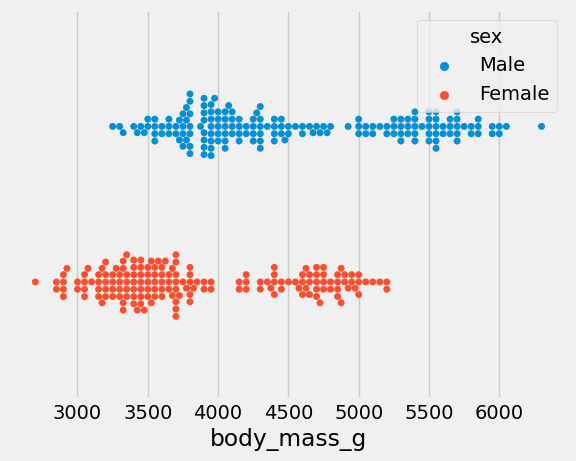

In [55]:
sns.swarmplot(data=penguins, x='body_mass_g', hue='sex', dodge=True);

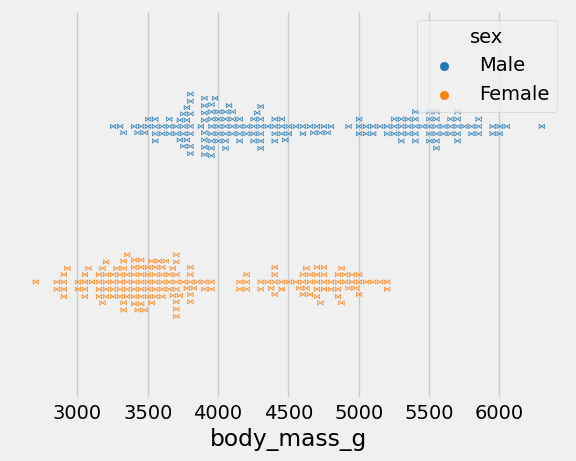

In [56]:
# você pode usar o marcador, e usar os TeX symbols, como indicado na documentação do matplotlib
sns.swarmplot(data=penguins, x='body_mass_g', hue='sex',
              palette='tab10', dodge=True, marker=r'$\bowtie$');

Tanto o *stripplot* como o *swarmplot* permitem que você faça gráficos usando os *facets*, de maneira bem simples e prática.

A documentação indica porém que é melhor usar a figure-level interface *catplot* (nesse caso, em comparação com a interface axis-level), mas também em relação à principal classe no seaborn que lida com isso, a FacetGrid, que será vista mais a diante.

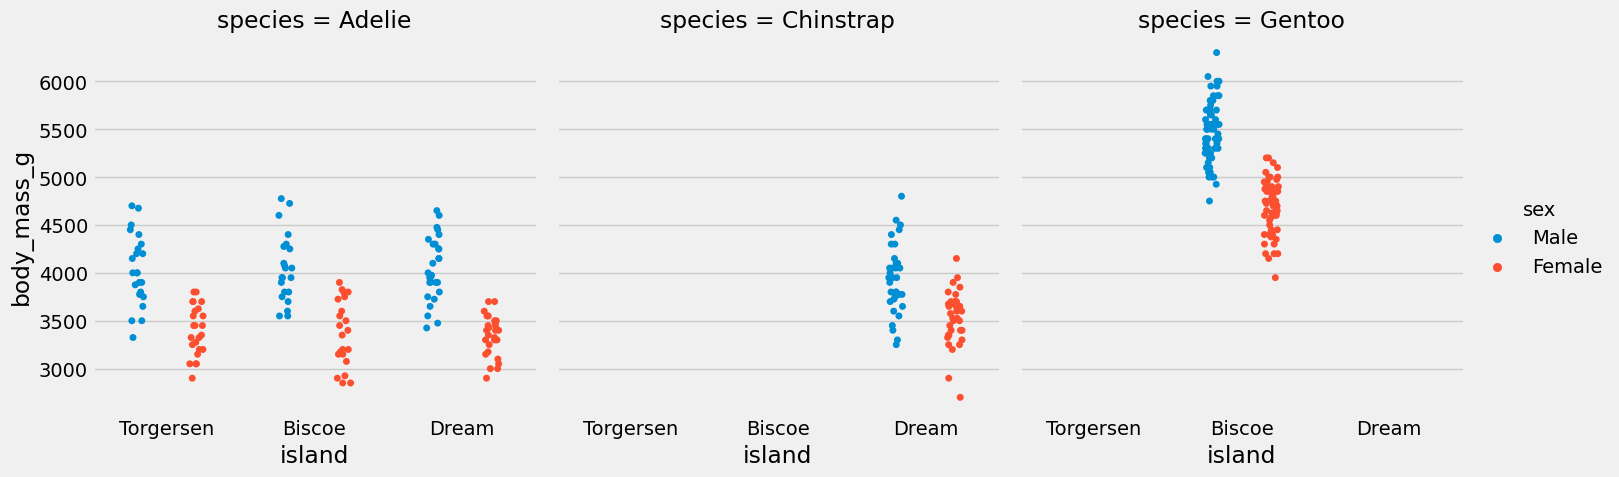

In [57]:
sns.catplot(data=penguins, x='island', y='body_mass_g', hue='sex', col='species', dodge=True);

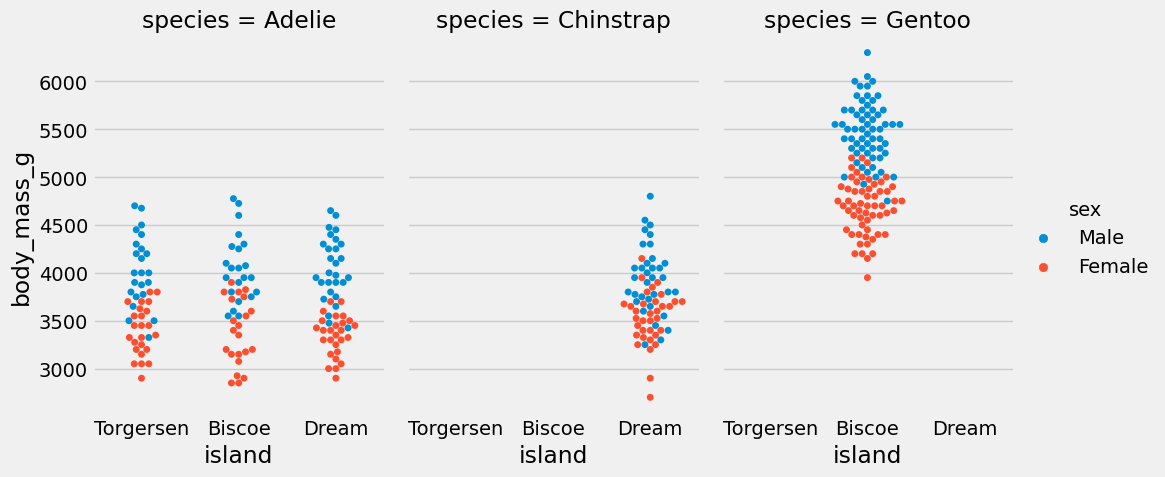

In [58]:
# o argumento aspect perfmite que você altere a proporção altura x largura do gráfico
sns.catplot(data=penguins, kind="swarm",
    x='island', y='body_mass_g', hue='sex', col='species', aspect=.7);

2. Gráficos categóricos para distribuições

O *boxplot* é provavelmente um dos gráficos mais conhecidos para visualizarmos a distribuição de uma (ou mais) variável.

Nesse contexto, queremos entender melhor sobre a distribuição de uma variável quantitativa em relação a uma variável categórica (ou níveis da variável categórica).

O entendimento da distribuição é feito por meio dos quartis, visualização da mediana, e identificação de outliers.

O seaborn traz também uma variação interessante desse tipo de gráfico, o *violinplot*, e outro também chamado *boxenplot*.

A seguir, o uso das interfaces figure-level e axis-level para atingir resultados semelhantes.

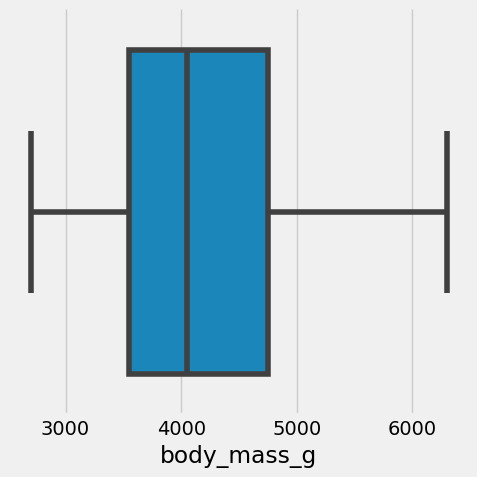

In [59]:
# Aqui ainda não temos uma variável categórica
sns.catplot(data=penguins, x='body_mass_g', kind='box');

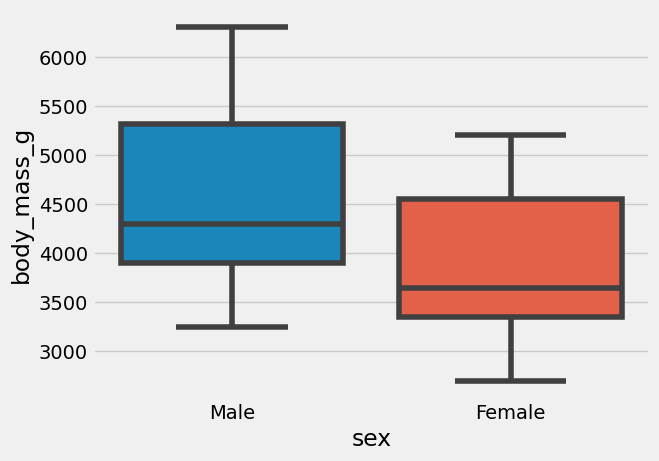

In [60]:
sns.boxplot(data=penguins, x='sex', y='body_mass_g');

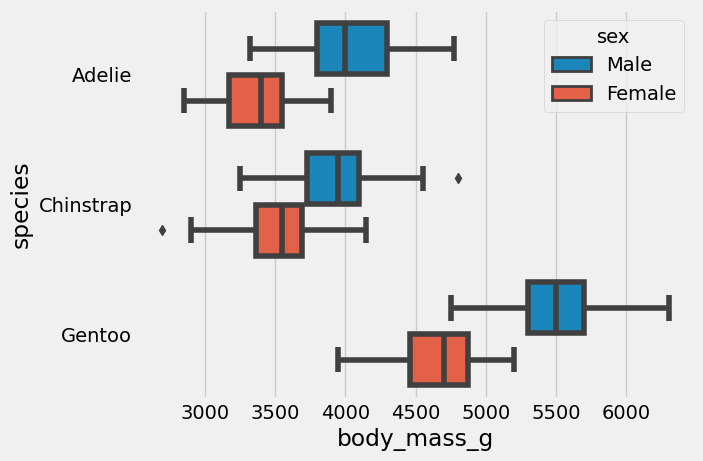

In [61]:
sns.boxplot(data=penguins, y='species', x='body_mass_g', hue='sex');

Como a própria documentação traz em alguns exemplos, há diversos *keyword arguments* adicionais que podem ser passados para customização dos gráficos. Mas para isso você deve procurar saber o que tem de disponível e como utilizar.

Essa parte de uso de keywords arguments acaba caindo diretamente na API do matplotlib (matplotlib.axes.Axes.boxplot).

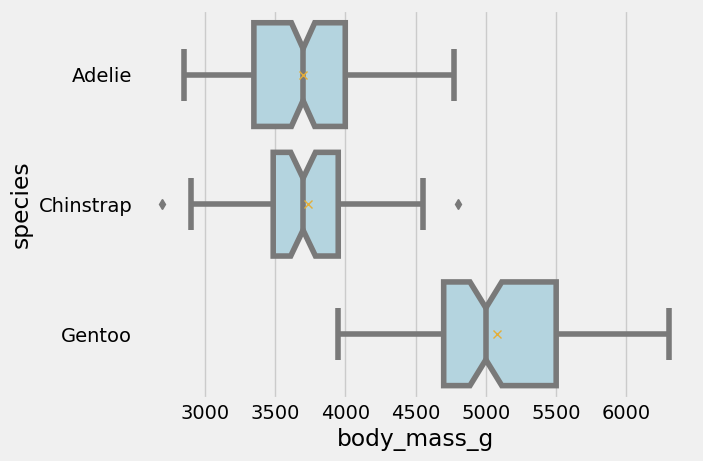

In [62]:
sns.boxplot(data=penguins, y='species', x='body_mass_g', color='lightblue',
            showmeans=True, meanprops={'marker': 'x'}, notch=True);

Os *violinplot* são muito similares ao *boxplot*, porém diferentemente desse último, os *violinplot* mostram também a distribuição por meio de uma estimativa de densidade do kernel (*kernel density estimation*). É uma maneira bem interessante de visualização, especialmente quando queremos **comparar** distribuições.

É importante lembrar que o *violinplot* é mais adequado à distribuição de dados contínuos, e não de contagem/inteiros. Para esses, o uso do boxplot, histograma seria mais interessante.

Mas deve-se atentar para que a suavização (mais intensa em datasets menores) não prejudique o entendimento do comportamento dos dados.

Também podemos atingir resultados similares por meio das interfaces figure-level e axis-level, como a seguir.

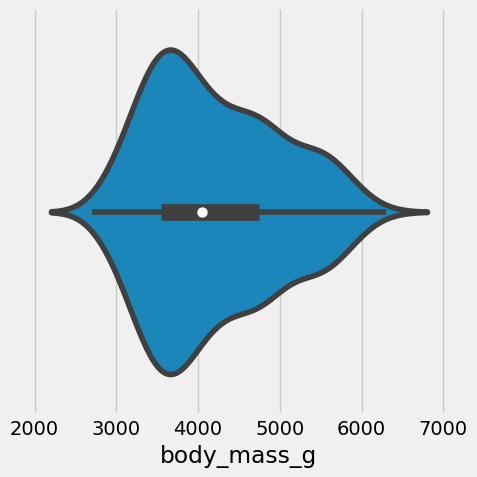

In [63]:
sns.catplot(data=penguins, x='body_mass_g', kind='violin');

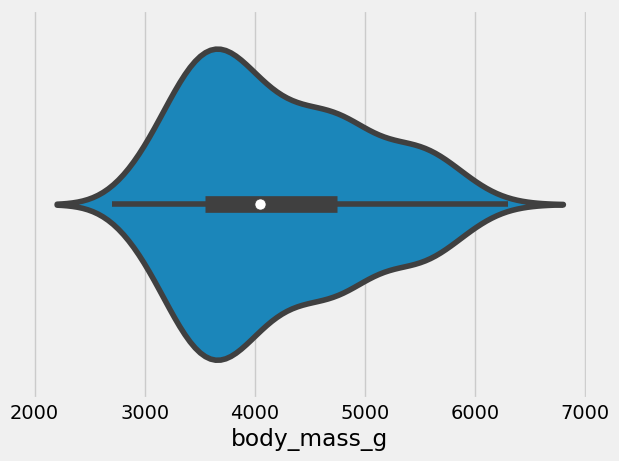

In [64]:
sns.violinplot(data=penguins, x='body_mass_g');

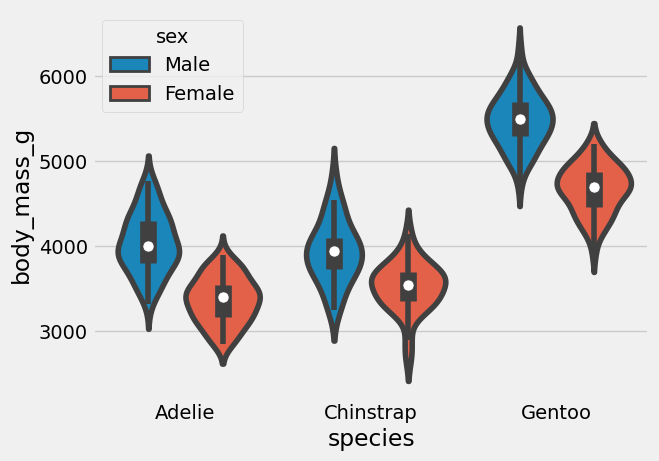

In [65]:
sns.violinplot(data=penguins, x='species', y='body_mass_g', hue='sex');

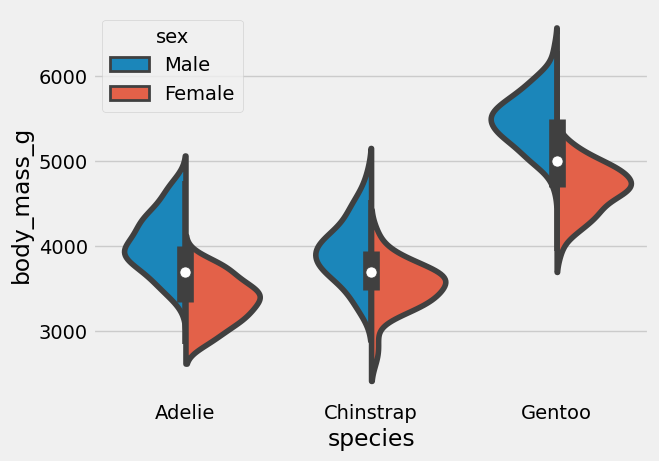

In [66]:
# O argumento 'split' para hue permite uma ligeira economia de espaço
sns.violinplot(data=penguins, x='species', y='body_mass_g', hue='sex', split=True);

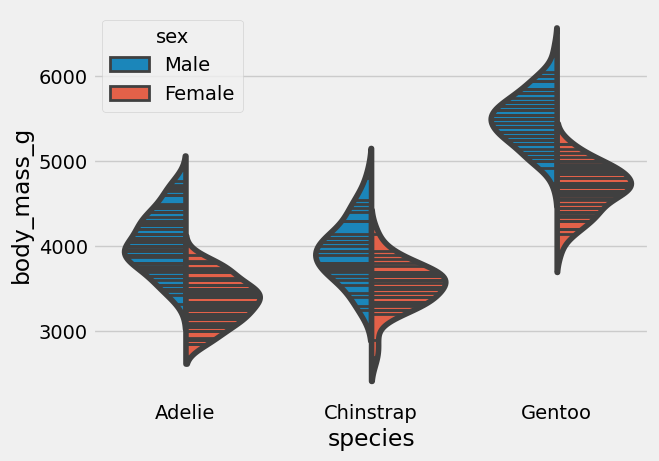

In [67]:
# O argumento "inner" é bem interessante, permite que você represente todas as observações
# dentro de cada violino

sns.violinplot(data=penguins, x='species', y='body_mass_g', hue='sex', split=True, inner='stick');

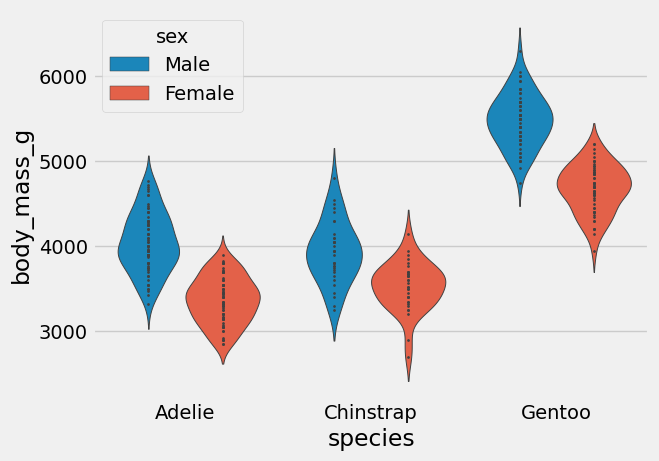

In [68]:
sns.violinplot(data=penguins, x='species', y='body_mass_g',
               hue='sex', inner='point', linewidth=.7);

O *boxenplot* não é muito comum de ser utilizado. De acordo com a documentação do seaborn, sua origem é explicada com mais detalhes [aqui](https://vita.had.co.nz/papers/letter-value-plot.html). Mas basicamente, esse tipo de gráfico mostra um grande número de quantis, e por conta disso foi denominado "letter-value plot". O uso de maior número de quantis tenta trazer mais informação sobre o formato da distribuição da variável.

Por trazer os dados de uma maneira não usual, seu uso deve ser cuidadosamente avaliado antes de trazê-lo para uma análise mais formalizada, como testando o uso de seus similares apresentados anteriormente.

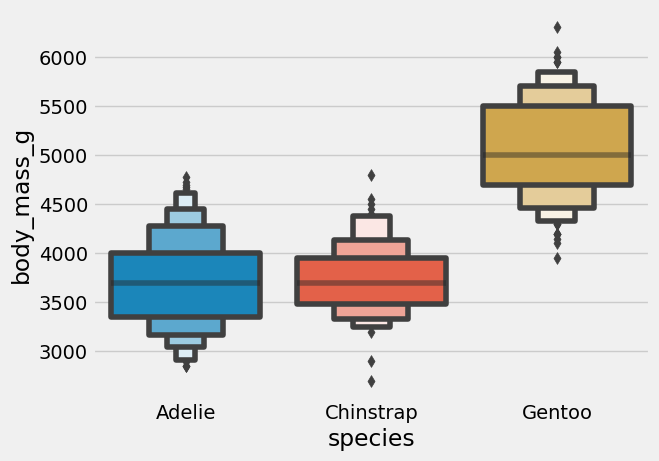

In [69]:
sns.boxenplot(data=penguins, x='species', y='body_mass_g');

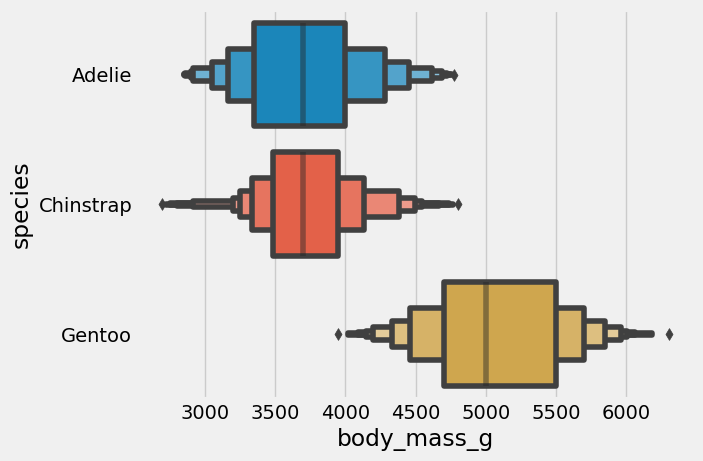

In [70]:
# Alguns argumentos, como k_depth (número das "caixas") devem ser avaliados para garantir a boa representação da distribuição

sns.boxenplot(data=penguins, y='species', x='body_mass_g', k_depth='proportion');

3. Gráficos categóricos de estimativas

Apesar do "point" no nome, esse gráfico é bem diferente do *scatterplot*, por exemplo. Seu princípio básico é apresentar uma estimativa de tendência dos dados (por padrão é a média, mas pode ser outra), com uma barra de erro.

É o tipo de gráfico bastante usado para mostrar interações entre fatores, que por sinal complementa muito bem visualmente uma ANOVA, por exemplo. Porém exatamente por mostrar apenas a estimativa de tendência dos dados, é interessante utilizar esse tipo de gráfico com outro que você possa analisar a distribuição, por exemplo, dos seus dados.

Com esse gráfico, podemos identificar a relação entre os níveis de uma (ou mais de uma) variável categórica com relação à uma variável quantitativa.

A seguir, as interfaces figure-level e axis level para o mesmo tipo de gráfico.

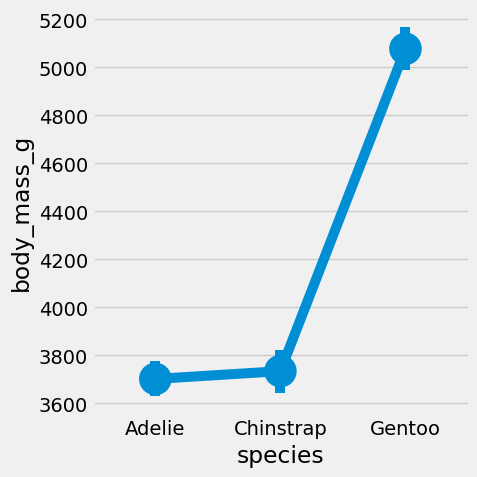

In [71]:
sns.catplot(data=penguins, x='species', y='body_mass_g', kind='point');

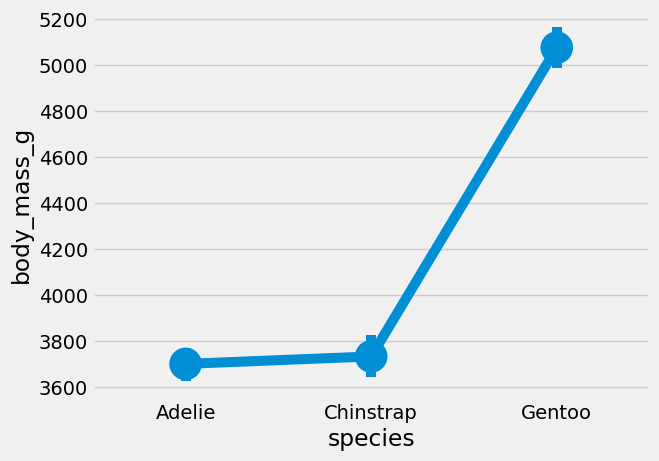

In [72]:
sns.pointplot(data=penguins, x='species', y='body_mass_g');

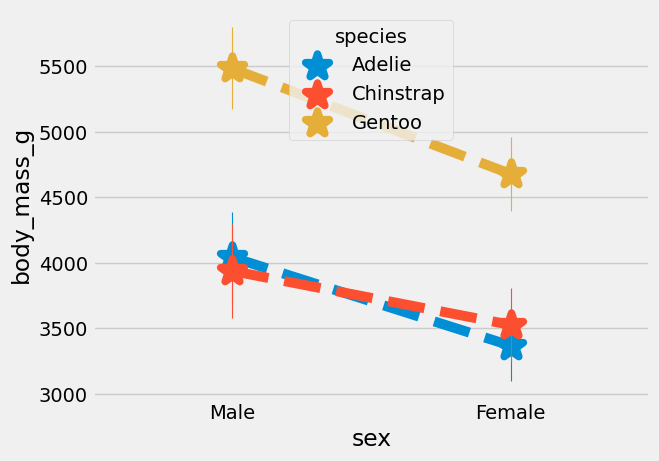

In [73]:
# No gráfico abaixo, as barras representam o desvio padrão da variável numérica nos níveis específicos da variável categórica. 
sns.pointplot(data=penguins, x='sex', y='body_mass_g', hue='species',
              linestyles='--', markers='*', errorbar='sd', errwidth=.8);

O *barplot* apresenta uma ideia bem similar ao *pointplot*, já que no geral disponibiliza uma estimativa da tendência central por meia da altura das barras. Também similar ao *pointplot*, pode trazer uma indicação de incerteza, como as *error bars*.

Um ponto interessante que a documentação do seaborn traz, é que quando você tem valores = 0 em seus dados, o *barplot* é uma boa escolha pois o 0 é incluído no *range* quantitativo. Se esse não for seu caso, provavelmente o *pointplot* é uma melhor opção, facilitando a visualização entre os níveis categóricos.

É importante destacar que você deve avaliar se o uso do *barplot* é a melhor opção para determinada situação. Como visto anteriormente, se há necessidade de mostrar a distribuição completa dos dados, provavelmente histogramas, boxplots e suas variações serão melhores opções.

A seguir, o uso das interfaces figure-level e axis-level para gráficos similares.

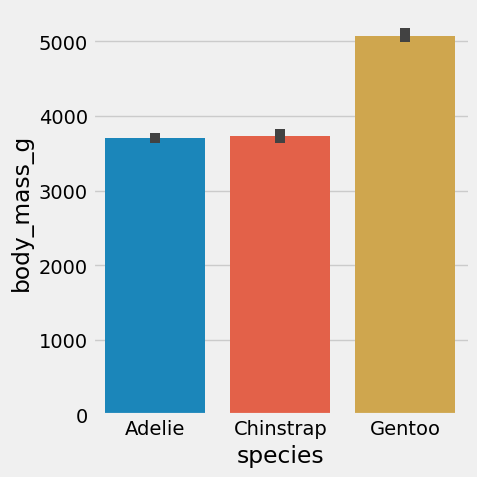

In [74]:
sns.catplot(data=penguins, x='species', y='body_mass_g', kind='bar');

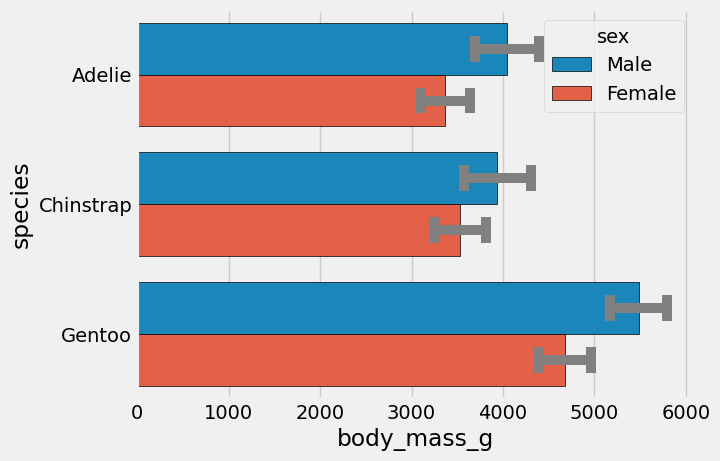

In [75]:
sns.barplot(data=penguins, y='species', x='body_mass_g', hue='sex',
            errorbar='sd', errcolor='gray', edgecolor='black', capsize=.2,);

E há ainda um gráfico pouco usado, o *countplot*. Seu visual, API, são bem similares ao barplot. De acordo com a documentação, é um gráfico que seria um tipo de histograma, mas para uma variável categórica. É importante destacar que esse gráfico não é a mesma coisa que um histograma. *Countplot* sempre irá tratar uma das variáveis como categórica.

Uma particularidade desse tipo de gráfico é que você não pode passar valores para x E y (semelhante a um histograma).

A seguir, interfaces figure-level e axis-level para o mesmo resultado.

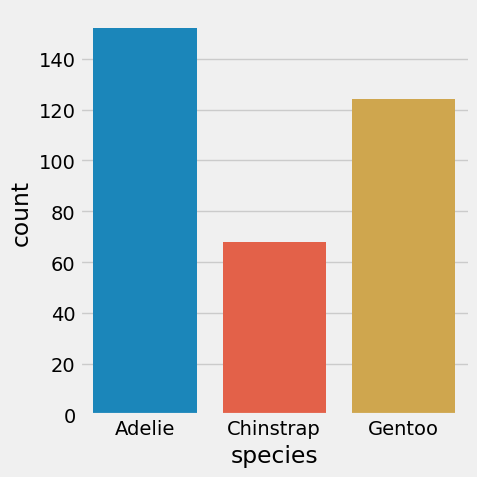

In [76]:
sns.catplot(data=penguins, x='species', kind='count');

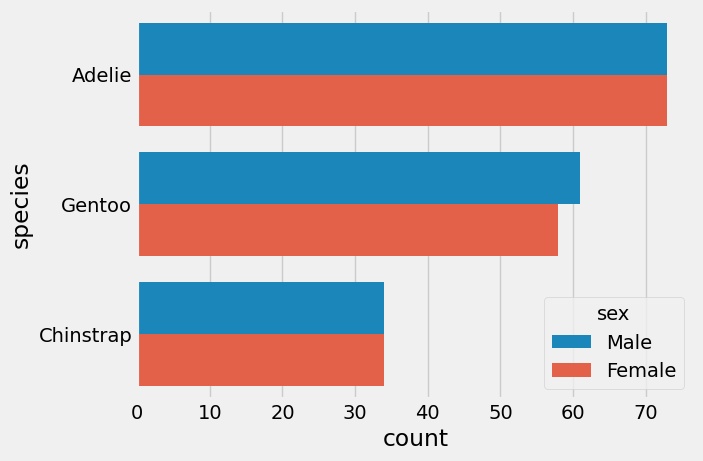

In [77]:
sns.countplot(data=penguins, y='species',
              order=['Adelie', 'Gentoo', 'Chinstrap'], hue='sex');

#### Gráficos para regressões

Quando temos mais de uma variável quantitativa (o que geralmente é o caso), e queremos explorar um pouco mais a relação entre algumas dessas variáveis, uma opção é fazer uso de um modelo estatístico e utilizá-lo para esse fim.

O exemplo mais comum provavelmente é a **regressão linear**.

Importante: caso o seu principal objetivo seja o uso de modelos de regressão, necessitando de detalhamentos de análise e interpretação, é recomendado o uso de libraries com diversos métodos para isso, como  *statsmodels*. O objetivo do seaborn, como apontad pela documentação, é mais no sentido exploratório e visual, com a praticidade que lhe é comum.

As duas principais funções são *regplot* e *lmplot*. A diferença entre elas, como já temos visto anteriormente, é que *lmplot* é da interface figure-level, enquanto *regplot* é da interface axis-level. Têm basicamente as mesmas funcionalidades, com alguns detalhes diferentes, por exemplo, *hue* só é aceito em *lmplot*; e *regplot*, diferentemente do *lmplot*, aceita também o uso de np.arrays e outros formatos para os argumentos de x e y.

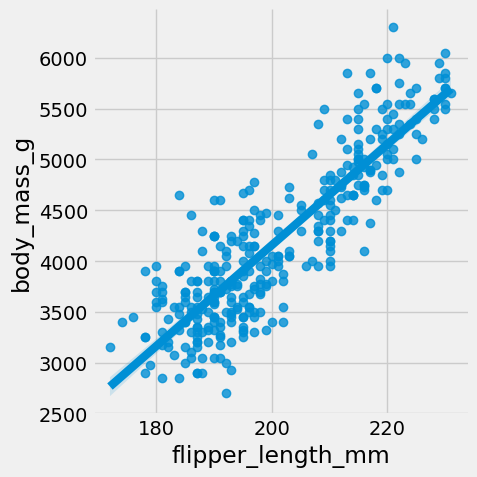

In [78]:
sns.lmplot(data=penguins, x='flipper_length_mm', y='body_mass_g');

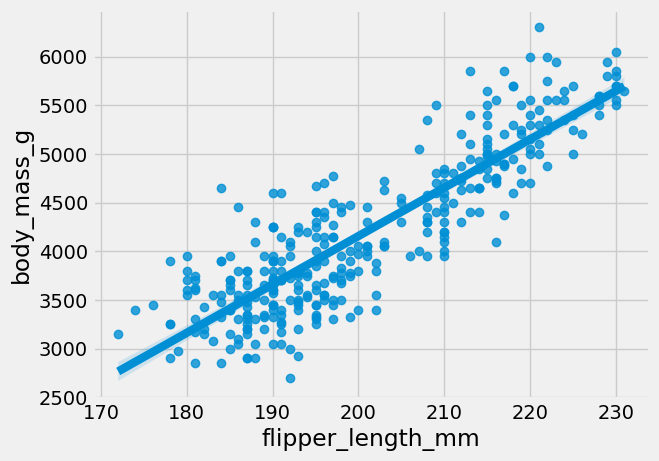

In [79]:
sns.regplot(data=penguins, x='flipper_length_mm', y='body_mass_g');

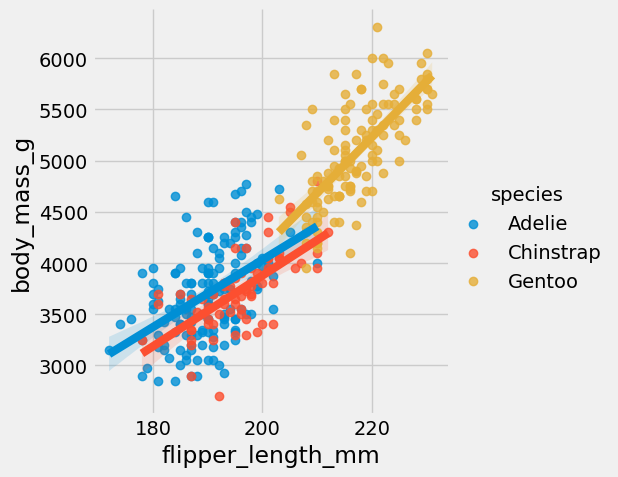

In [80]:
sns.lmplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species');

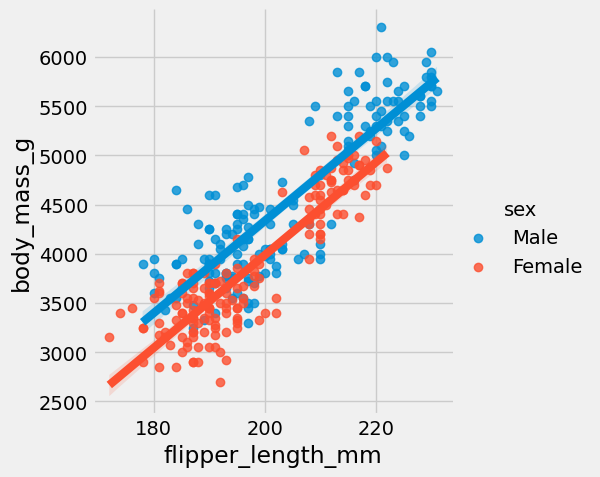

In [81]:
sns.lmplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='sex');

É possível também ajustar outros modelos além do linear, tanto para *lmplot* como para *regplot*.

A seguir apenas para exemplo, não necessariamente são modelos que seriam os indicados para os dados sendo avaliados.

Há diversos argumentos interessantes que podem ser justamente o que você precisa para sua análise exploratória rápida e eficiente.

Um ponto a favor da interface figure-level *lmplot*, é que essa é uma combinação entre *regplot* e a classe FacetGrid, responsável pelos múltiplos plots. Então o uso do argumento *col* pode ser muito úitl quando há diversas variáveis e níveis a serem avaliados.

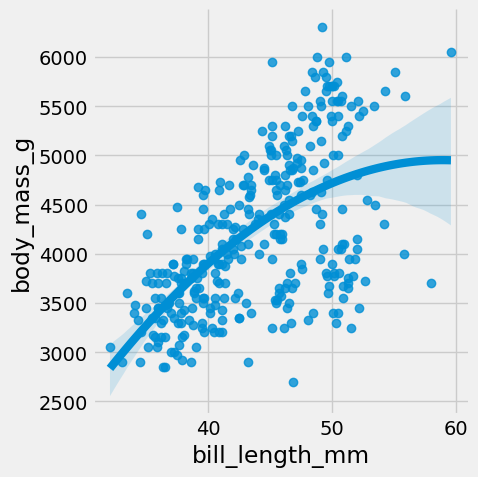

In [82]:
sns.lmplot(data=penguins, x='bill_length_mm', y='body_mass_g',
           order=2);

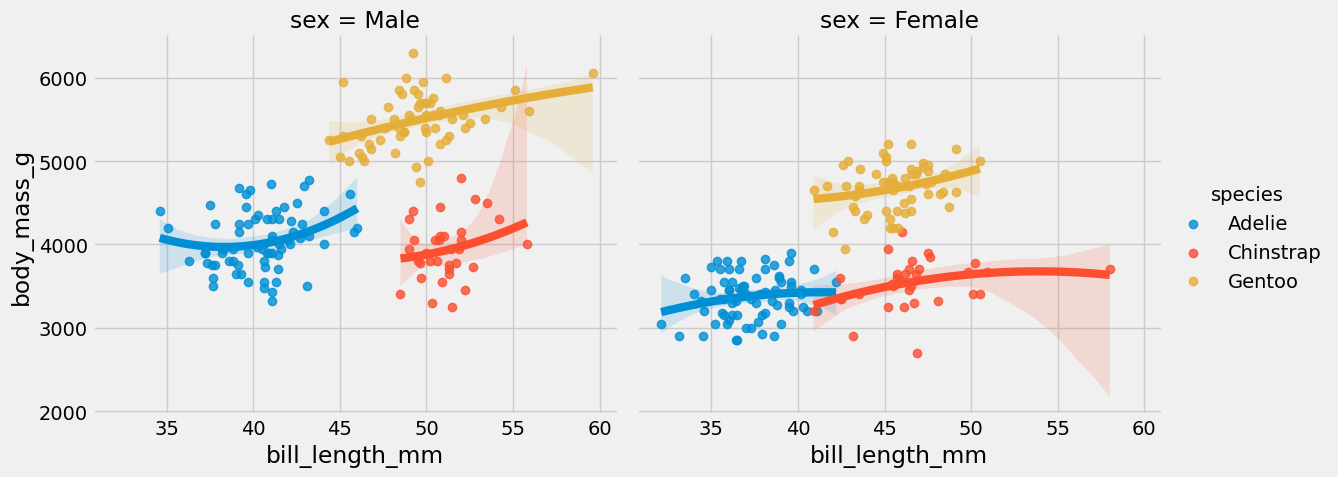

In [83]:
sns.lmplot(data=penguins, x='bill_length_mm', y='body_mass_g',
           hue='species', col='sex', aspect=1.2, order=2,
           facet_kws=dict(sharex=True, sharey=True));

#### Múltiplos gráficos (*multiplot grid*)

FacetGrid é a (principal) classe do seaborn responsável por esse tipo de gráficos, nos quais podemos alocar variáveis às linhas e colunas, resultando em um grid de gráficos. Aqui, o uso de *hue* se dá de maneira diferente do que quando usamos uma função da interface de axis-level, como será visto.

A documentação sugere uma maneira de uso na qual iniciamos o objeto FactGrid() com os argumentos de data, x e y, e logo sem seguida podemos trazer funções gráficas usando o FacetGrid.map() (ou map_dataframe).

Lembrando que as interfaces figure-level *relplot* e *catplot* também permitem o uso de variáveis no argumento *col*, e que podem também servir ao propósito desejado.

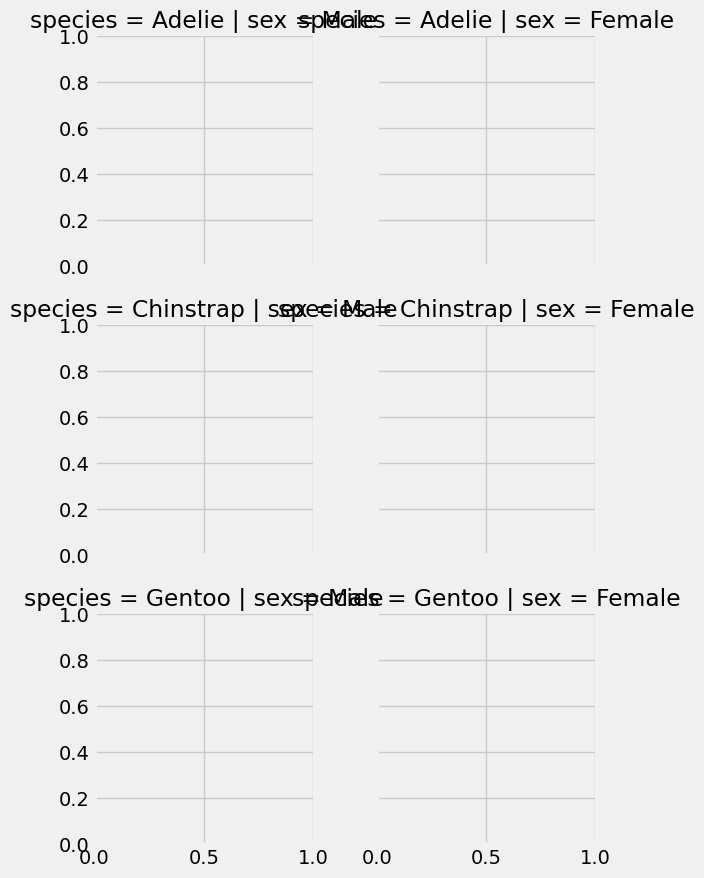

In [84]:
# Inicializando o objeto com as variáveis para construir o grid
sns.FacetGrid(data=penguins, col='sex', row='species');

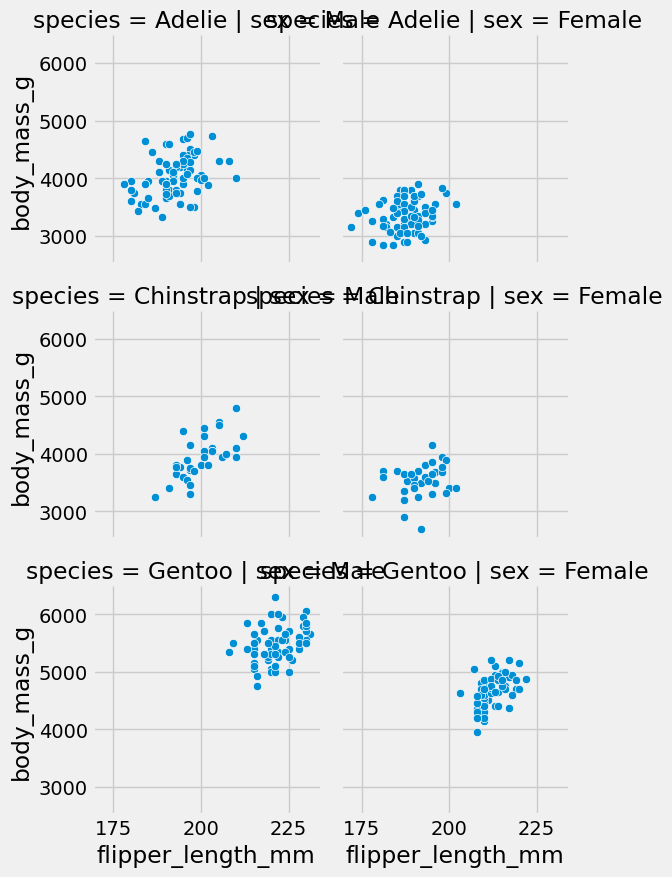

In [85]:
p = sns.FacetGrid(data=penguins, col='sex', row='species')
p.map(sns.scatterplot, 'flipper_length_mm','body_mass_g');

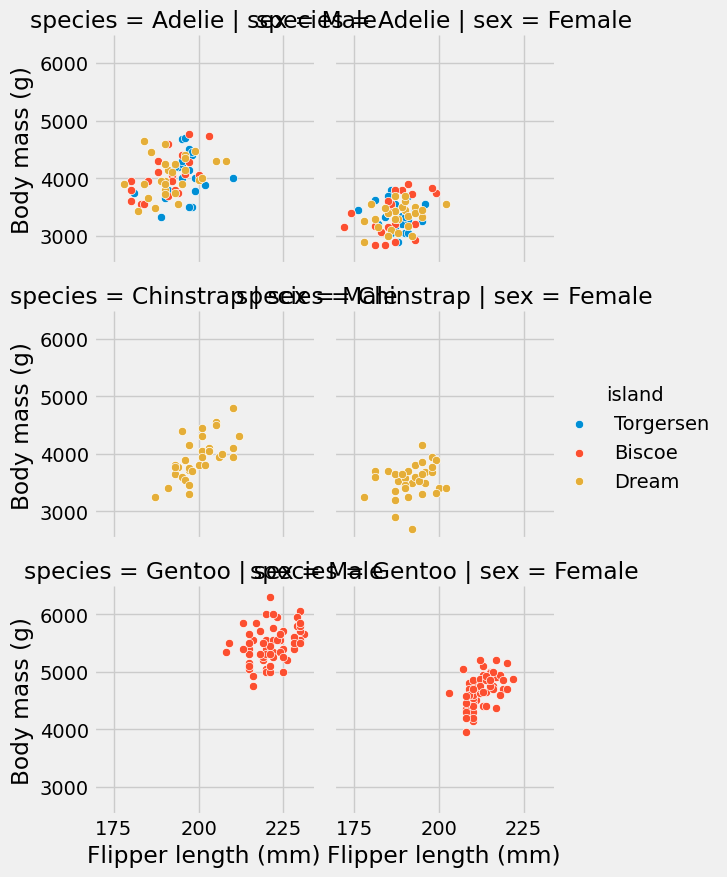

In [86]:
# Argumentos como hue devem ser passados ao objetivo FacetGrid
# assim como outros que não são disponibilizados automaticamente, como a legend
p = sns.FacetGrid(data=penguins, col='sex', row='species', hue='island')
p.map(sns.scatterplot, 'flipper_length_mm','body_mass_g')
p.add_legend()
p.set_axis_labels('Flipper length (mm)', 'Body mass (g)');

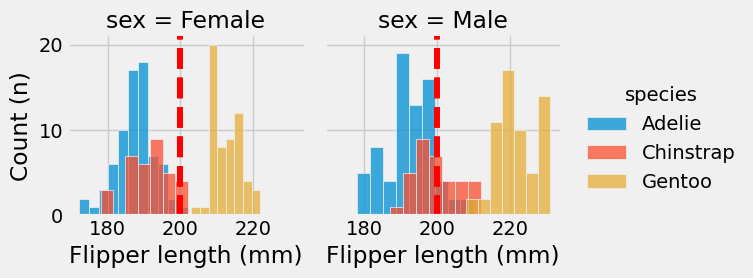

In [87]:
p = sns.FacetGrid(data=penguins, col='sex', hue='species', col_order=['Female', 'Male'])
p.map(sns.histplot, 'flipper_length_mm')
p.add_legend()
p.refline(x=200, color='r')
p.set_axis_labels('Flipper length (mm)', 'Count (n)');

#### Gráficos para múltiplas correlações x Heatmap x Clustermap

A razão pela qual trago diferentes tipos de gráficos juntos, é que vejo que há certa confusão sobre o que cada um entrega.

Para fazer um gráficos de múltiplas correlações (aqui se referindo à relações entre múltiplas variáveis), no seaborn temos a opção de usar um *scatterplot matrix* por meio do **pairplot()**. Esse tipo de gráfico permite vermos a relação entre pares de variáveis numéricas, por meio de *scatterplots*, e de *histograms* ou *density plots* de cada variável na diagonal. Atenção: esse não é um gráfico para visualização de valores de correlações, como as de pearson/spearman, etc. Porém é muito útil no início da análise exploratória, assim podemos já entender um pouco do comportamento das variáveis numéricas e de suas respectivas relações.

Já o **heatmap()** permite a representação gráfica dos dados sendo que na matriz, as cores e suas variações representam os valores. Assim, conseguimos avaliar as informações em um espaço bi-dimensional, como por exemplo intensidade e distribuição. É uma opção interessante para detecção de padrões, especialmente quando temos muitas observações, mas que podem ser agrupadas de alguma maneira. É uma maneira comum de reprentar dados climáticos, por exemplo, sendo que os dias de observações podem ser agrupados em quinzenas, meses, anos... E a composição de cores é bastante intuitiva, por exemplo, cores mais quentes associadas a temperaturas maiores e por aí vai.

O seaborn tem ainda uma maneira bastante prática de mostrar relações hierárquicas entre as variáveis, por meio do **clustermap()**. Esse tipo de gráfico é bastante similar ao heatmap, mas com o adicional de representar cluster hierárquicos entre as linhas e colunas dos dados (não se esqueça de ter instalado o scipy). É bem interessante a praticidade desse tipo de gráfico, seus argumentos já permitem que você faça a padronização dos dados, escolha o método para cáclulo do cluster hierárquico, além da métrica de distância usada. Todas essas opções vêm do scipy, e recomendo a pesquisa.

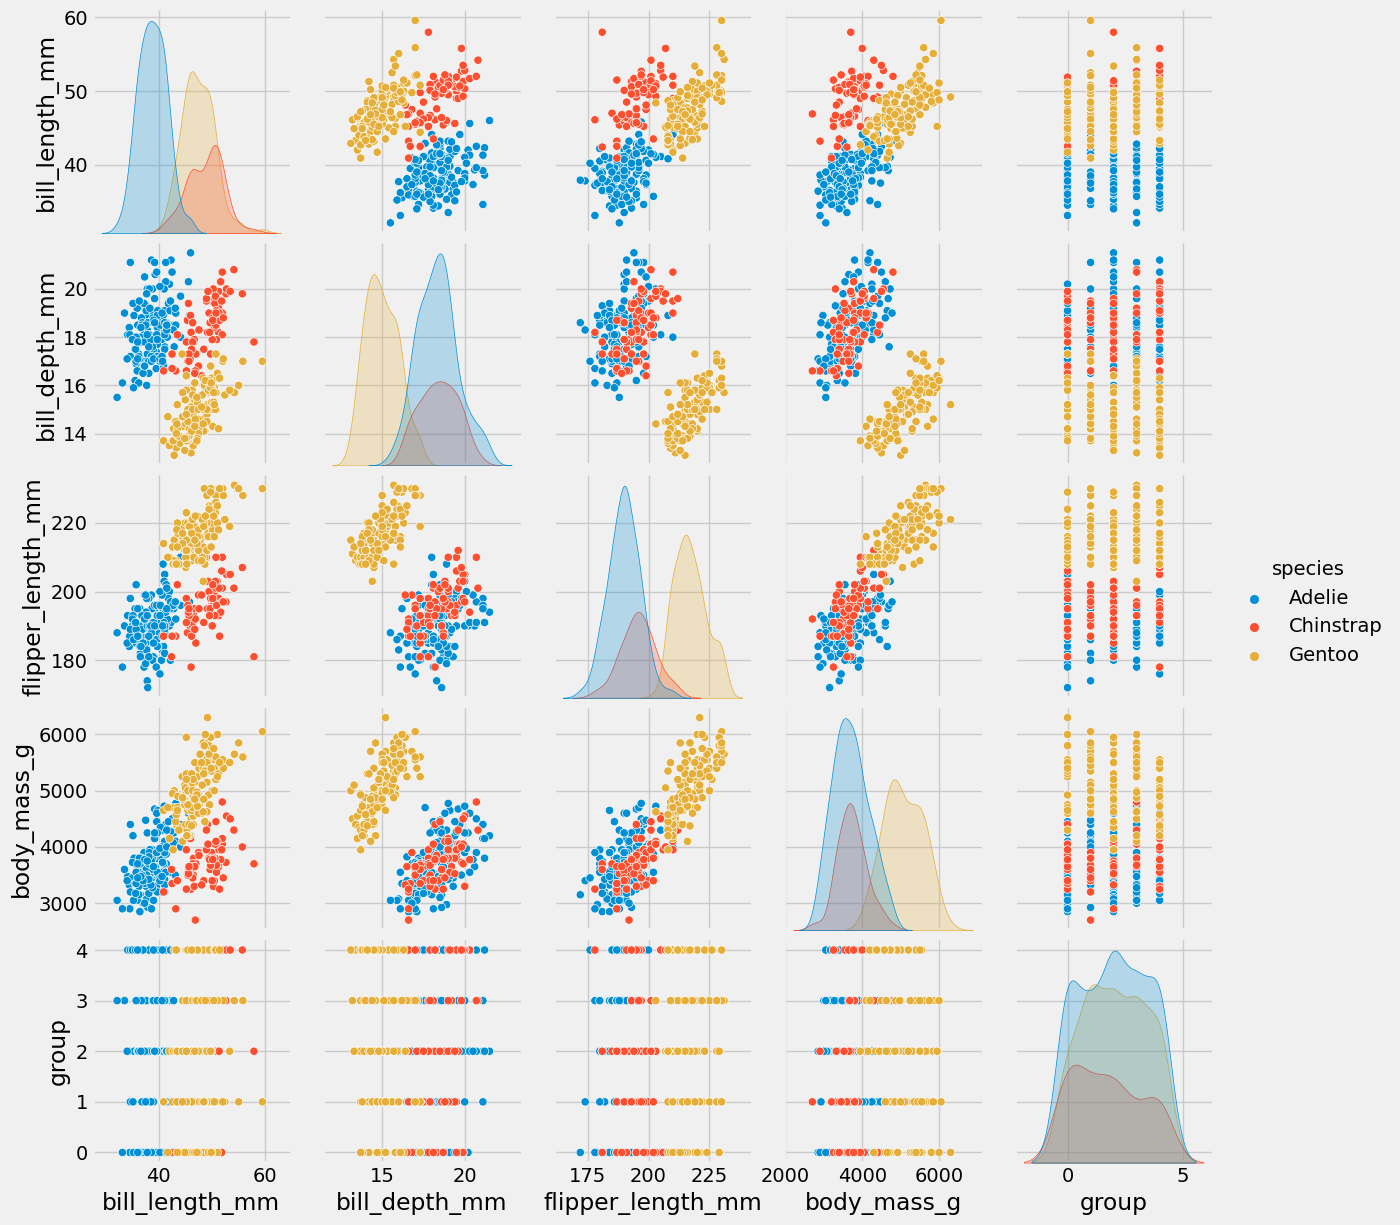

In [88]:
# A seguir, a variavel "group" criada anteriormente também será usada, a não ser que você retire-a
sns.pairplot(data=penguins, hue='species');

In [89]:
# Para exemplificar o heatmap, os datasets usados não são interessantes, pois precisamos de um dataset 2-D
# vamos criar um apenas para exemplo

df = pd.DataFrame(np.random.random((15,15)),
                  columns=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o'])


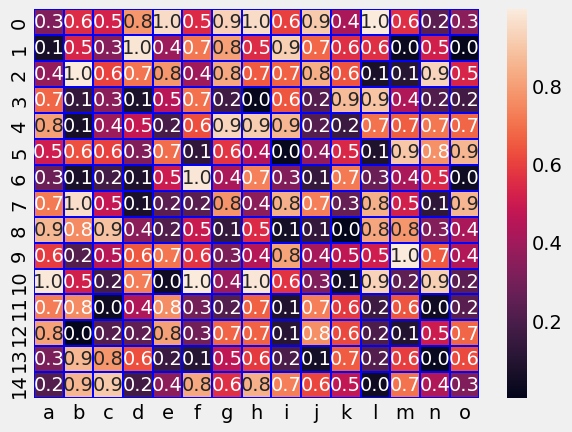

In [90]:
sns.heatmap(df, annot=True, fmt=".1f",
            linewidth=.3, linecolor="blue",);

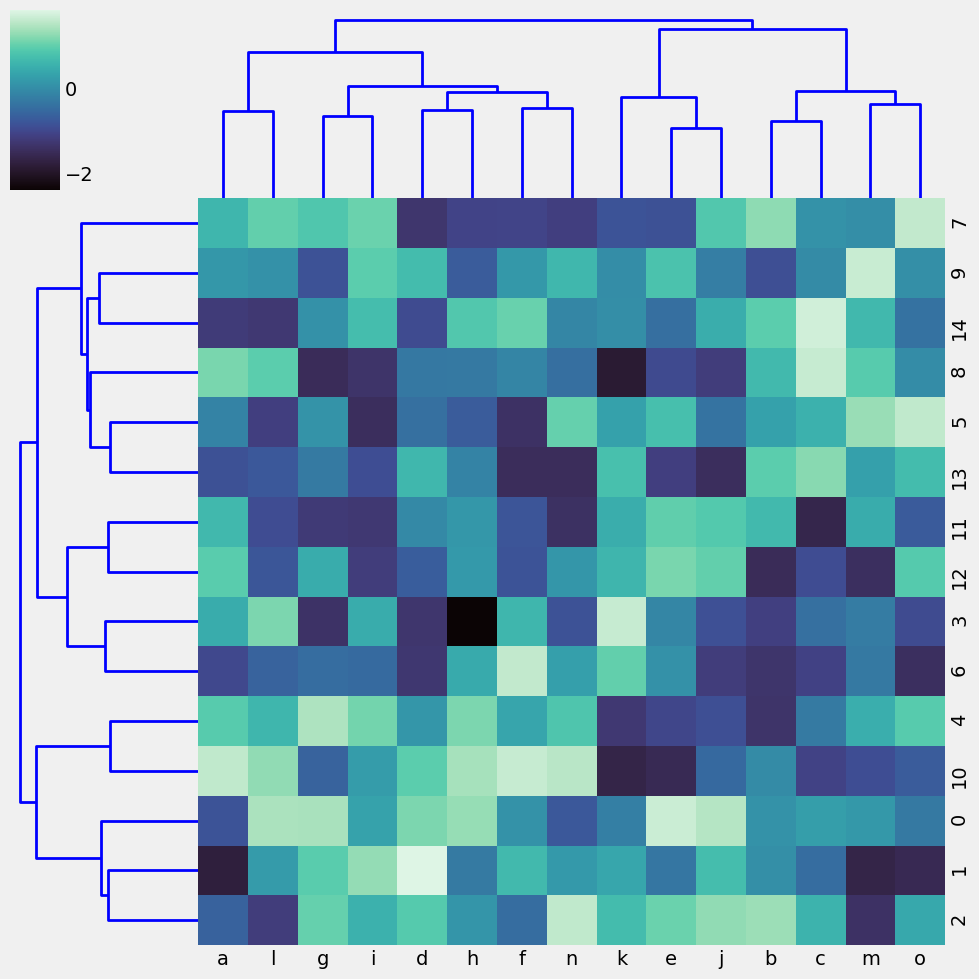

In [91]:
# Continuando com os mesmos dados do exemplo anterior
# você pode também padronizar os dados, usando os argumentos standard_scale ou z_score
# (o exemplo a seguir mostra algumas das opções)
sns.clustermap(df, z_score=1, method='ward',
               cmap='mako', tree_kws={'color': 'blue', 'linewidth':2});

### Seaborn com customizações com matplotlib

Nessa seção, continuaremos explorando o uso do seaborn, tentando entender sobre as variáveis, e trazendo as potencialidades de customização de alguns gráficos utilizando o matplotlib.

Isso porque esse cenário de uso de ambas as libraries provavelmente assemelha-se mais com as necessidades do dia-dia de análise e visualização de dados.

Continuo com os mesmos datasets, *planets* e *penguins*. Ambos diferem bastante entre si não somente devido ao assunto que tratam, mas quanto às suas constituições. *Penguins* é um dataset de fácil uso para fins de exemplos, equilíbrio entre quantidade de variáveis categóricas e numéricas, sem desbalanceamento e variáveis que facilmente imaginamos ter algum tipo de associação. Já o *Planets* é uma escolha menos óbvia, apenas uma variável categórica, desbalanceamento com relação à variável categórica e grande amplitude de escala de valores na maior parte das variáveis numéricas.

Creio que devido a isso sejam uma combinação interessante para um tutorial, e têm mais chance de representar as questões que nos deparamos na vida real.

In [92]:
# Checar as variáveis e seus tipos
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [93]:
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [94]:
# Um resumo estatístico ainda bem geral
# Cuidado com a interpretação, por isso a importância de saber sobre as variáveis
planets.describe()

number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75%       2.000000      526.005000    3.040000   178.500000  2012.000000
max       7.000000   730000.000000   25.000000  8500.000000  2014.000000

#### Gráficos relacionais

Nessa seção, mostro exemplos de uso do *scatterplot* e *lineplot* para observação e interpretação das relações bivariadas.

Antes, uma breve observação sobre diferentes maneiras de uso do matplotlib.

#### Interfaces do matplotlib: funcional e orientada a objetos

Provavelmente você já se deparou com o uso de *matplotlib.pyplot* as plt num código de gráfico, como a seguir:

> import matplotlib.pyplot as plt
> 
> plt.scatter(x,y)
> 
> plt.show()

Assim como você também já deve ter visto *fig, ax = plt.subplots()* iniciando também outros gráficos do matplotlib:

> fig, ax = plt.subplots()
> 
> ax.scatter(x,y)
> 
> ax.set_title('Plot')
> 
> plt.show()

Ambas as maneiras de construir gráficos do matplotlib são válidas, apenas se referem a diferentes tipos de uso do código.

Na interface funcional (a primeira acima), de acordo com a própria documentação, o que temos é uma maneira muito semelhante ao *matlab* de se fazer gráficos. Todos os comandos de plt. modificam a mesma figura, me maneira relativamente simples e rápida. Para gráficos simples em que você não trabalhará com muitas variáveis, modificações ou múltiplos plots, está bem ok.

Porém, caso não seja essa a condição (e frequentemente não é, especialmente em uma análise na qual muitos gráficos serão gerados), a melhor opção seria o uso da interface orientada a objetos - aqui customização, múltiplos objetos e seu reuso são possíveis e na verdade fazem parte da sua estrutura.

É claro que você pode usar a interface orientada a objeto mesmo que vá fazer apenas um gráfico simples. E com o tempo acaba se tornando algo mais natural.

A melhor maneira de entender essas diferenças é lendo a documentação e outras fontes de informação, como [essa](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/) e é claro, testando.

Um pouco mais sobre esse assunto pode ser encontrado nas referências a seguir:

+ [use-patterns](https://matplotlib.org/3.2.1/api/index.html#usage-patterns)

+ [oop](https://medium.com/@kapil.mathur1987/matplotlib-an-introduction-to-its-object-oriented-interface-a318b1530aed)


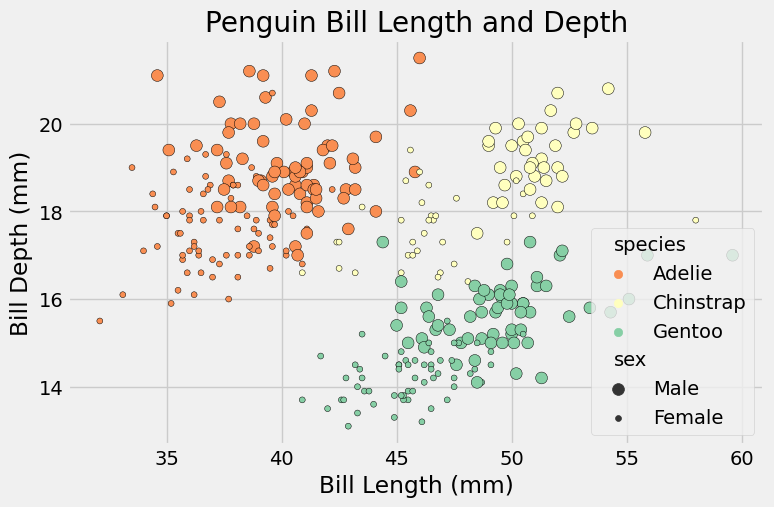

In [95]:
# Exemplo do uso da interface funcional

plt.figure(figsize=(8, 5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species', palette='Spectral', size='sex', edgecolor='black')
plt.title('Penguin Bill Length and Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

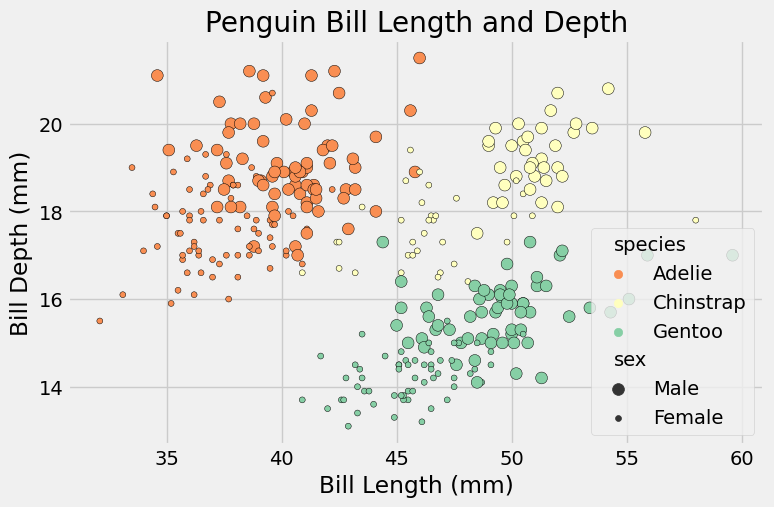

In [96]:
# Mesmo exemplo que o anterior, na object-oriented interface:

fig, ax = plt.subplots(figsize=(8, 5)) # essa é uma figura única, por isso não especifico num. de linhas e colunas
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species', palette='Spectral', size='sex', edgecolor='black', ax=ax)
ax.set_title('Penguin Bill Length and Depth') # alguns métodos têm uma escrita diferente, como títulos e labels
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
plt.show() # continuamos usando plt, pois esse é um método do objeto matplotlib.pyplot

O resultado é exatamente igual, mas acima temos um tipo de gráfico simples, nada que a interface funcional não pudesse resolver facilmente.

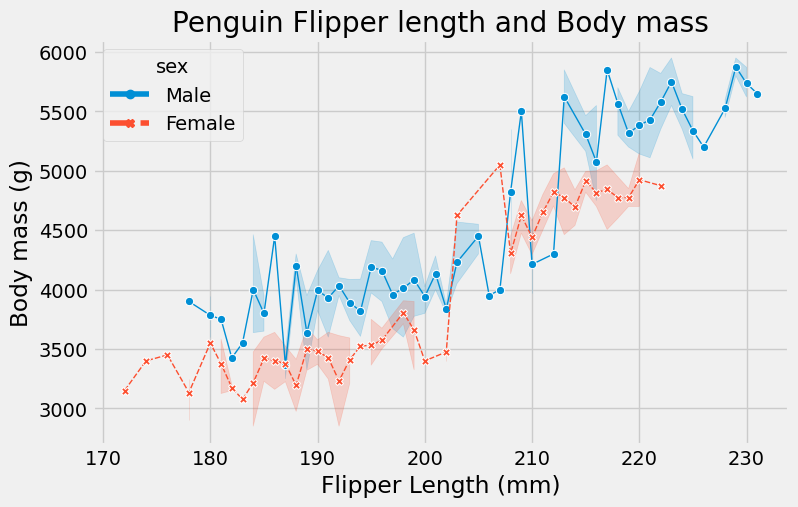

In [97]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=penguins, x='flipper_length_mm', y='body_mass_g',
             hue='sex', style='sex', markers=True, lw=1, ax=ax)
ax.set_title('Penguin Flipper length and Body mass')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body mass (g)')
plt.show()

Caso eu quisesse múltiplos plots, um para *male* e outro para *female*, no caso do seaborn deveria utilizar a sua interface figure-level *relplot*. 

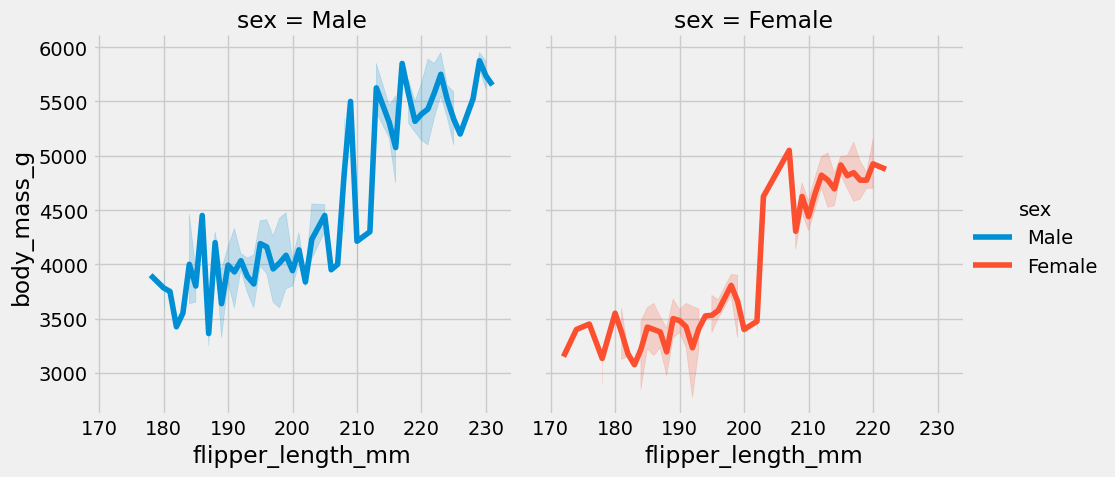

In [98]:
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g',
            col='sex', hue='sex', kind="line");


Similarmente, poderia usar a interface orientada a objeto do matplotlib e a interface axis-level, *lineplot*.

Se você tentar usar a figure-level como do exemplo anterior, receberá um warning (UserWarning: relplot is a figure-level function and does not accept the `ax` parameter) e também verá mais de um gráfico gerado).

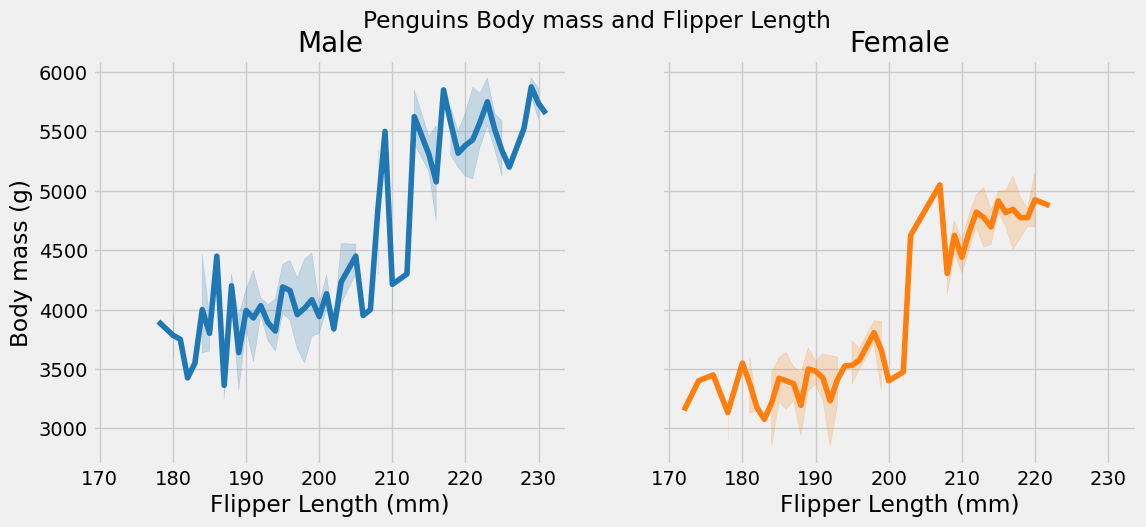

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True, sharex=True) # aqui já devemos indicar 1 linha e 2 colunas (similar ao anterior)
sns.lineplot(data=penguins.query('sex == "Male"'), x='flipper_length_mm', y='body_mass_g', ax=ax[0], color='tab:blue')
ax[0].set_xlabel('Flipper Length (mm)')
ax[0].set_ylabel('Body mass (g)')
ax[0].set_title('Male')
sns.lineplot(data=penguins.query('sex == "Female"'), x='flipper_length_mm', y='body_mass_g', ax=ax[1], color='tab:orange')
ax[1].set_xlabel('Flipper Length (mm)')
ax[1].set_title('Female')
fig.suptitle('Penguins Body mass and Flipper Length') # o subtitulo pertence à fig
plt.show()

Perceba que a quantidade de código usada na abordagem seaborn + matplotlib (que também poderia ser somente matplotlib) é maior, porém a possibilidade de mudar legendas, titulos, subtitulos é maior. O seaborn já traz um pouco disso padrão, mas em ocasiões precisamos mudar um pouco a estética do que está no dataset, por exemplo.

#### Gráficos para a distribuição dos dados

A seguir, o uso de *histplot* para avaliar a distribuição dos dados.

No dataset *planets*, além do desbalanceamento dos dados, há também uma variação bem intensa na magnitude dos valores (sugerindo a presença de *outliers*). Isso certamente afeta a visualização dos dados, e é uma situação relativamente comum. Se voltarmos no describe() acima, veremos que para essa variável, os valores ficam mais próximos da casa de algumas centenas (75% = 526). Mas há um valor máximo muito alto, o que provavelmente está causando isso à visualização.
Ainda não pudemos observar a quantidade desses dados, e a visualização da distribuição irá nos ajudar nisso.

Como ás vezes não temos ainda conhecimento suficiente sobre o contexto dos dados/área de negócio, não é recomendado assumirmos que os dados de valores discrepantes são outliers com origem em erro de obtenção (erro na imputação, etc) e deletarmos. Pode ser que estejamos deletando informação importante, que de fato corresponde à realidades pouco usuais (o outlier "útil" ao entendimento).

Para facilitar a visualização, uma solução prática, amplamente usada no contexto de visualização, é o uso da escala logarítmica dos dados. Nesse caso, já até há um argumento nos plots do seaborn para nos ajudar nisso.

[Text(0.5, 1.0, 'Planets Orbital Period')]

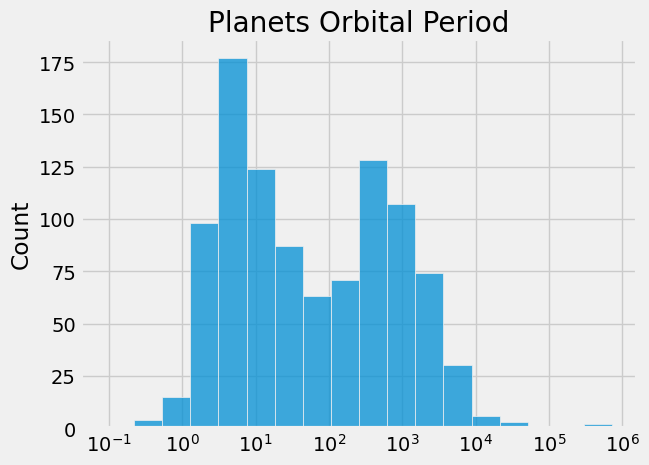

In [100]:
# testar sem o uso da escala log para ver como a visualização fica difícil
h1=sns.histplot(data=planets, x='orbital_period', log_scale=True)
h1.set(xlabel=None)
h1.set(title='Planets Orbital Period')

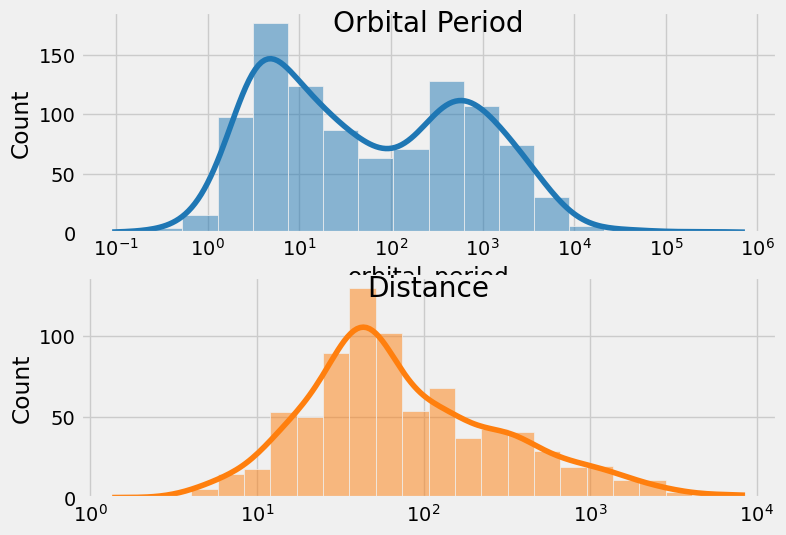

In [101]:
fig, ax = plt.subplots(2,1, figsize=(8,6))
h1=sns.histplot(data=planets, x='orbital_period', log_scale=True,
             color='tab:blue', kde=True, ax=ax[0])
h1.set_title('Orbital Period', y=1.0, pad=-14)
h2=sns.histplot(data=planets, x='distance', log_scale=True,
             color='tab:orange', kde=True, ax=ax[1], legend=False)
h2.set_title('Distance', y=1.0, pad=-14)
h2.set_xlabel(None) # poderia tbm ser .set(xlabel=None) como no exemplo anterior
plt.show()

Uma maneira de automatizar a construção de vários histogramas de uma vez só, para todas as variáveis numéricas durante uma etapa inicial de análise exploratória dos dados.

In [102]:
# Define quais sâo as variáveis numéricas
# acima, vi que tenho int64 e float64
numerical_vars = planets.select_dtypes(include=['float64', 'int64']).columns

# checar:
# numerical_vars

# Quero fazer um grid de subplots, mas primeiro preciso definir
# o número de linhas e colunas (primeiro argumento necessário)
n_rows = int(len(numerical_vars) / 2) 
n_cols = int(len(numerical_vars) / n_rows) + len(numerical_vars) % n_rows

# checar
print(n_rows)
print(n_cols)
# vejo que nesse caso, um grid de 2 linhas e 3 colunas p/ minhas variáveis deve ficar ok

2
3


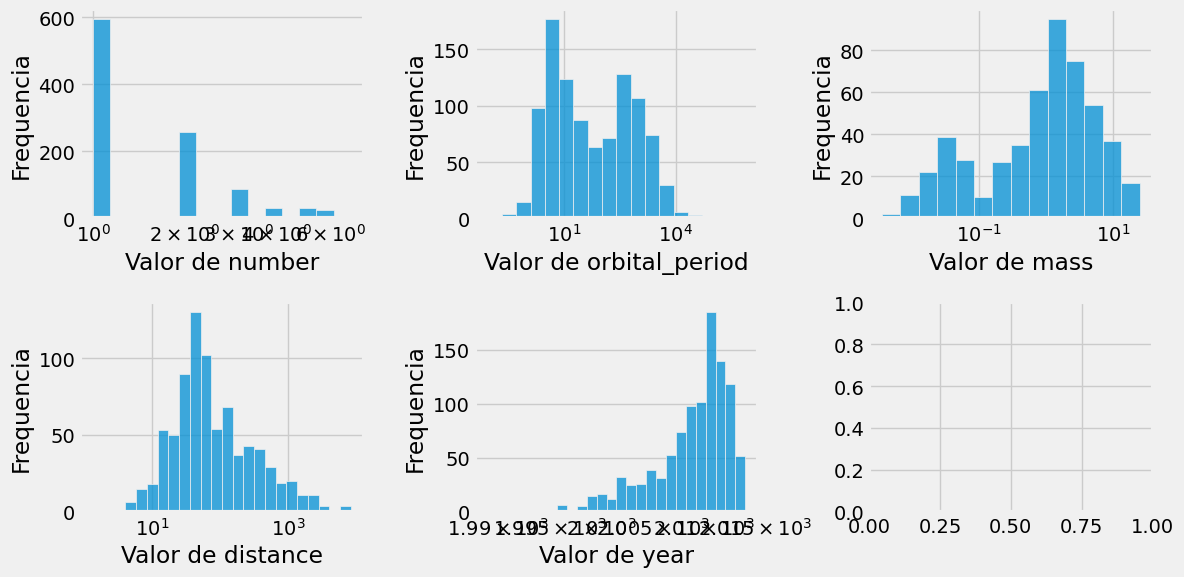

In [103]:
# (Obs: a função enumerate é bastante últil em loops, nos quais
# queremos a iteração sobre os elementos com contagem)

# Começa a construir a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6)) 
for i, var in enumerate(numerical_vars):
    ax = axes[int(i / n_cols), i % n_cols] if n_rows > 1 else axes[i % n_cols]
    sns.histplot(planets[var], ax=ax, log_scale=True)
    ax.set_title('')
    ax.set_xlabel('Valor de {}'.format(var))
    ax.set_ylabel('Frequencia')
plt.tight_layout()  # isso ajuda a ajustar o espaçamento entre os subplots
plt.show()

O ponto forte dessa visualização acima não é a beleza (não estaria pronto para uma publicação ainda), mas a praticidade de observar a distribuição de todos os dados numéricos de uma vez só. Certamente não é a única maneira de se fazer isso, mas é um bom exercício.

#### Gráficos para variáveis categóricas

Alguns dos gráficos para variáveis categóricas mais comuns, e que de quebra também já nos permite avaliar a distribuição dos dados e presença de outliers, é o *boxplot*.

Como já apontado anteriormente, na seção de gráficos categóricos dos gráficos usando apenas o seaborn, acredito que essa library se destaca bastante nessa etapa. Com muita facilidade permite a construção de gráficos do tipo *scatter* para essas variáveis, com controle da sobreposição dos pontos, que não é algo tão simples de se fazer no matplotlib.

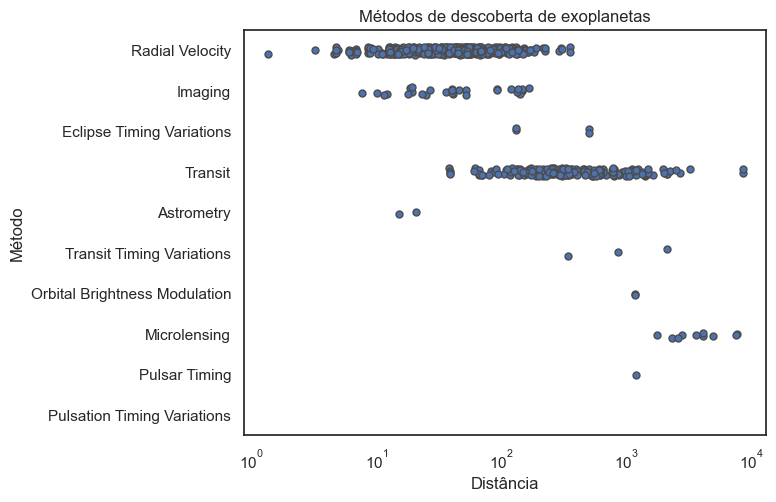

In [150]:
fig, ax = plt.subplots(figsize=(6,5))
sns.stripplot(data=planets,
              x='distance',
              y='method',
              linewidth=1, # linewidth para ter o contorno dos pontos
              ax=ax) 
ax.set_xscale("log") # Para esse tipo de plot, o log_scale não é um argumento,
# e achei mais fácil usar o matplotlib para esse tipo de controle
ax.set_title('Métodos de descoberta de exoplanetas')
ax.set_ylabel('Método') # também usando o matplotlib para nomes dos eixos
ax.set_xlabel('Distância')
plt.show()

Por meio da última figura, temos razões para interpretar que o método de *radial velocity* resultou em maior número de descoberta de planetas, especialmente naqueles (relativamente) mais próximos. 

Numa análise exploratória, frequentemente usamos em paralelo, além de ferramentas visuais como os gráficos, simples técnicas como a de agrupamento dos dados. A seguir, podemos confirmar esse tipo de entendimento por meio de um **groupby:**

In [ ]:
# Agrupa os dados por meio do método, e na coluna distancia, faz a contagem de ocorrências
planets.groupby('method')['distance'].count()

method
Astrometry                         2
Eclipse Timing Variations          4
Imaging                           32
Microlensing                      10
Orbital Brightness Modulation      2
Pulsar Timing                      1
Pulsation Timing Variations        0
Radial Velocity                  530
Transit                          224
Transit Timing Variations          3
Name: distance, dtype: int64

In [ ]:
# Agrupa os dados por meio do método, e na coluna distancia, calcula a média de distancia para cada método
planets.groupby('method')['distance'].mean()

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

Agora podemos ter certeza que o método mais frequente realmente é o *radial velocity*. Só não é o que corresponde aos planetas mais próximos, devido a presença do *astrometry*, que tem uma média de distância menor, porém esse valor refere-se a apenas 2 planetas.

Já *microlensing* é o método que correspondeu aos planetas mais distantes (distância > 4000), ocorridos na descoberta de 10 dos planetas.

Novamente notamos o desbalanceamento dos dados, já que *radial velocity* corresponde ao dobro de ocorrência de *transit*, e muitas vezes mais a ocorrência dos demais métodos.

Para qualquer análise estatísticas mais detalhada, esse é um fato importante a ser levado em consideração.

Já no dataset penguins, a seguir, mais um exemplo do *swarmplot*, que lida ainda melhor evitando a sobreposição dos pontos para pequenos bancos de dados, com alguns ajustes para um visual de apresentação, que por padrão já traz fontes maiores nos eixos e título/subtítulo (mas que você pode ajustar) com uso direto de parâmetros do matplotlib.

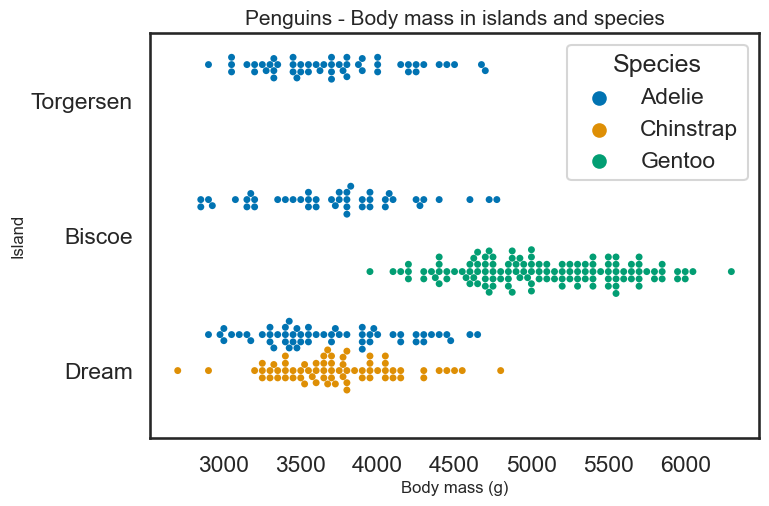

In [148]:
with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.swarmplot(data=penguins, x='body_mass_g', y='island',
                  hue='species', dodge=True, ax=ax, palette='colorblind')
    ax.set_xlabel('Body mass (g)', fontsize=12)
    ax.set_ylabel('Island', fontsize=12)
    ax.set_title('Penguins - Body mass in islands and species', fontsize=15)
    ax.legend(title='Species')
    plt.show()

Veja a seguir outro exemplo de boxplot com o dataset penguins.
Como já mostrado, os ajustes de estética podem ser feitos de acordo com o contexto e necessidades específicas.

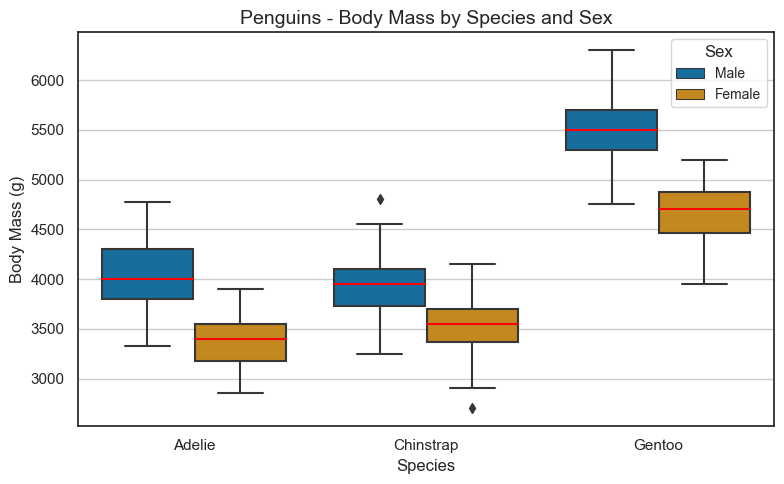

In [ ]:
sns.set(style='white') # outra maneira de utilizar os estilos do seaborn

fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='sex',
            palette='colorblind', medianprops={'color': 'red'}, ax=ax)
# Customizar visual
ax.set_xlabel('Species', fontsize=12)
ax.set_ylabel('Body Mass (g)', fontsize=12)
ax.set_title('Penguins - Body Mass by Species and Sex', fontsize=14)
ax.legend(title='Sex', fontsize=10, title_fontsize=12, loc='upper right')
ax.yaxis.grid(True) # add linhas de grid horizontais

plt.tight_layout()
plt.show()

#### Multiplots grids

Como já visto na seção anterior, no seaborn, a classe FacetGrid que é a principal responsável por essa implementação de múltiplos plots, e os métodos *relplot()*, *displot()*, *catplot()* e *lmplot()* já utilizam a classe internamente. Com esses, conseguimos fazer gráficos em grid de maneira bastante prática, aproveitando-se das abstrações fornecidas pelo seaborn. 

Lembrando que podemos usar principalmente as dimensões de row, col e hue para apresentação dos dados multivariados. E uma maneira de começar o uso desse tipo de gráfico é inicializar a figura com a classe FacetGrid(), já indicando qual variável por exemplo será usada em *col*, e prosseguirmos com o mapeamento do tipo de gráfico e variáveis.

Para usarmos o matplotlib nesse tipo de construção, devemos usar a interface orientada a objetos dessa library, declarando o numero de linhas e colunas, construindo as *fig* e *axis*.

*Matplotlib + seaborn ou seaborn + matplotlib?*

Assim como você pode construir uma figura com fig, ax usando matplotlib, e o tipo de gráfico com seaborn (ex: sns.histplot) como visto anteriormente na construção dos histogramas para todas as variáveis numéricas, você também pode construir uma figura usando FacetGrid, e trazendo a função gráfica do matplotlib para o *map*, como a seguir:

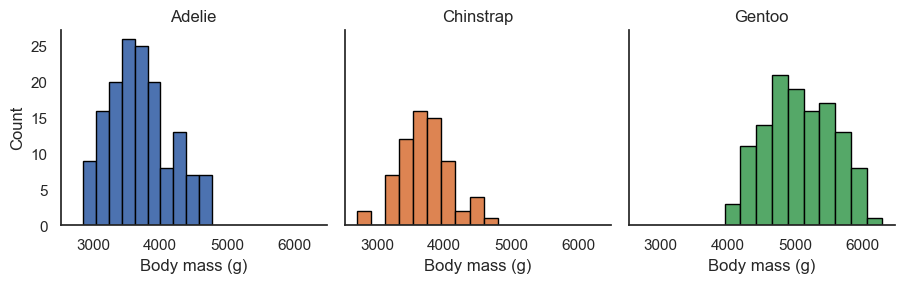

In [137]:
g = sns.FacetGrid(penguins, col='species', hue='species', col_wrap=3)
g.map(plt.hist, 'body_mass_g', edgecolor='black') # histograma do matplotlib
g.set_axis_labels(x_var='Body mass (g)', y_var='Count') # ajustes estéticos do seaborn
g.set_titles('{col_name}')
plt.show()

A seguir, mais uma comparação sobre o mesmo resultado final de um *scatterplot*, utilizando vias um pouco diferentes.

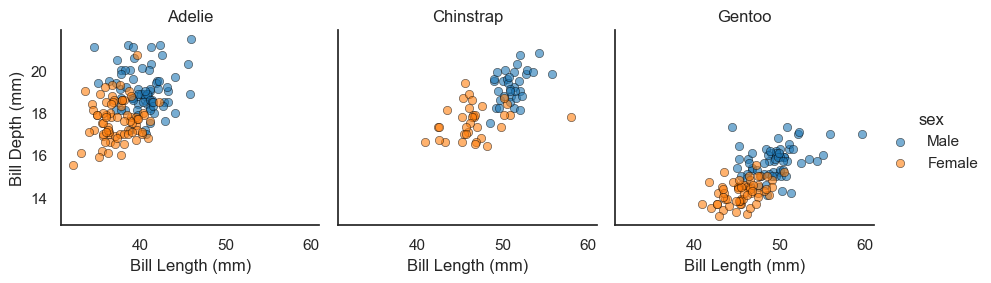

In [139]:
f = sns.FacetGrid(penguins, col='species', hue='sex', palette='tab10')
f.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm', alpha=.6, ec='black')
f.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
f.set_titles('{col_name}')
f.add_legend();

Uma maneira de atingir um tipo de visualização similar, trazendo um pouco do matplotlib diretamente, pode ser como o exemplo a seguir:

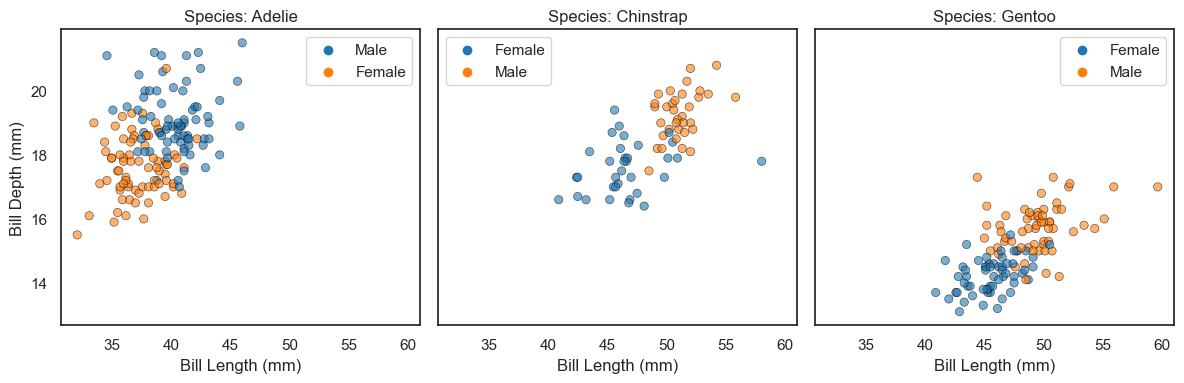

In [143]:
species = penguins['species'].unique()

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

for i, spec in enumerate(species): # novamente usando a lógica do enumerate
    data = penguins[penguins['species'] == spec]
    ax = axes[i]
    sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='sex',
                    palette='tab10', ax=ax, ec='black', alpha=.6)
    ax.set_title('Species: ' + spec)
    ax.set_xlabel('Bill Length (mm)')
    ax.set_ylabel('Bill Depth (mm)')
    ax.legend()

plt.tight_layout()
plt.show()


Bem similar! Claro que para a versão usando matplotlib foi usado mais código, e isso se deve especialmente ao fato de que o seaborn já possui a abstração para a questão dos grids de subplots. E também há muitas maneiras de se chegar num gráfico do matplotlib parecido com o exemplo, e essas maneiras vão estar mais relacionadas com a sua familiaridade com o uso da programação.

Acima, continuei usando o sns.scatterplot() devido à sua facilidade em trazer os argumentos e inserir a variável categórica para cor.

Pode parecer não fazer sentido esse tipo de abordagem, mas é possível que a pessoa não esteja tão familiarizada com o *seaborn*, por exemplo, e não conheça o FacetGrid(), mas saiba de cabeça da existência de métodos mais comuns, como o sns.scatterplot(), e também já tenha mais familiridade com o uso de matplotlib e sua construção de subplots.

#### Context e styles

Continuando o mesmo raciocício, e trazendo mais algumas funcionalidades de seaborn + matplotlib.
Abaixo, faço uso do **plotting_context()** do seaborn para mudar o visual apenas de um gráfico específico.

O plotting_context() está mais associado à escala de elementos como labels e linhas, não afetando o estilo como um todo. O estilo eu defini lá no início do notebook, e utilizei um estilo do matplotlib que tenho costume de usar ('bmh'). Mas suponha que **preciso fazer um gráfico para uma apresentação do tipo poster**, em que justamente preciso desses elementos de tamanho maior, e ficar ajustando um por um pode ser bem tedioso.

As opções de plotting_context() do seaborn podem ser dos tipo “notebook”, “paper”, “talk”, e “poster”. Vou utilizar o poster, e ao invés do seu similar set_context() que tem influencia global no seu notebook, irá modificar apenas o gráfico no qual está sendo usado.

Veja abaixo, que alguns argumentos, como o uso de Tex Symbol para o formato do ponto foi usado para mostrar algumas opções que temos à disposição. Perceba a diferença do tamanho nos elementos, e como isso pode ajudar em determinados contextos, como por exemplo o de apresentação. Caso haja a necessidade de mudar algum *fontsize*, isso também pode ser feito no código e irá se sobrepor ao plotting_context(), como no caso do título, que coloquei uma fonte bem menor do que a padrão desse contexto.

Obs: O seaborn também tem styles (ver set_style()), checar a documentação para entender as opções. 

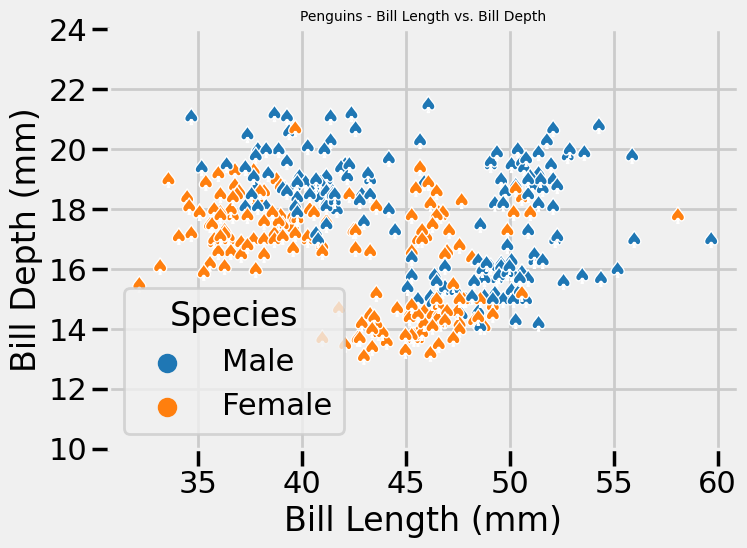

In [107]:

with sns.plotting_context("poster"):
    
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='sex',
                    palette='tab10',  marker=r'$\spadesuit$', ax=ax)

    # Customize plot appearance
    ax.set_xlabel('Bill Length (mm)')
    ax.set_ylabel('Bill Depth (mm)')
    ax.set_title('Penguins - Bill Length vs. Bill Depth', fontsize=10) # testar valores mais adequados
    ax.legend(title='Species')

    # Set custom ticks for the x-axis and y-axis
    ax.set_xticks(range(35, 61, 5))
    ax.set_yticks(range(10, 26, 2))

    ax.tick_params(axis='both', which='major')

    plt.tight_layout()
    plt.show()

#### Sobre o uso de matplotlib + seaborn: alguns aspectos visuais

Uma dúvida que pode surgir, é qual a razão de usar matplotlib para ajustar o tamanho da figura, e ao final, chamanndo *plt.show()*.

Quanto ao *plt.show()*, a própria documentação do seaborn traz uma breve explicação disso. O matplotlib entende de maneira distinta a criação de uma figura, e a sua visualização, que é justamente a função dessa linha de código que geralmente será usada, exceto quando você for salvar a figura em disco, por exemplo. Quando num notebook temos o *inline* ou *widget* backend sendo chamado, automaticamente os plots serão visualizados em cada chunk de código, sem a necessidade de novamente chamar o *plt.show()*. E o seaborn entra nessa questão devido ao fato de ser feito sobre o matplotlib, e estar "de acordo" com muitas de suas práticas.

## Aplicação em dados reais: agricultura

A seguir, um breve exemplo de análise exploratória inicial com alguma interpretação sobre os dados.

*Sobre o objetivo da análise*

De uma maneira geral (e que pode variar com o contexto), os objetivos de boa parte das análises exploratórias têm a ver com:

+ Explorar dados, observando sua sanidade e fazendo os ajustes necessários;

+ (De maneira que pode se repetir:) Criar questões, tentar respondê-las, Adicionar/adaptar outras questões;

+ Entrega: uma eda pode ser por si só o objetivo final, como também pode ser uma importante etapa para uma futura modelagem dos dados;

Você pode usar esses pontos como guia e adaptar ao seu contexto. Mas lembre-se da importância de se familiarizar com os dados, o assunto, o negócio para que trabalhar com as questões a serem respondidas seja algo mais natural.

*Sobre os dados* 

Os dados referem-se ao resultado da operação de colheita de grãos de soja em um determinado talhão e safra.
(Importante lembrar que a soja é uma cultura cultivada, quase que exclusivamente, durante o período de safra, e que no local a que está associada - estado do Mato Grosso, tem plantio comumente feito durante o mês Outubro).

Há variáveis descrevendo a **operação mecanizada**, como Distancia, Duracao, Velocidade, Largura, Usocombustivel; há variáveis descrevendo o ambiente (talhão), como Elevacao; há as variáveis referentes à **produtividade**, como Umidade, MassaCorn, Rendimentos, Cultivar; e há ainda variáveis adicionadas por meio de um produto do **sensoriamento remoto**, no caso bandas com reflectância correspondente às bandas R,G,B e NIR de satélite multiespectral.

Um ponto importante sobre os dados, e que não está claro ao importarmos o dataframe, é que as variáveis relacionadas ao sensoriamento remoto (bandas de satélite multispectral) são de uma imagem específica, datada da última quinzena do mês de Dezembro. Há determinados momentos da fenologia da cultura em que a associação com variáveis relacionadas com a produtividade, e a própria produtividade é mais forte. Há muitos estudos científicos que abordam isso, e caso você precise lidar com isso, seja na soja ou em outra cultura, é importante fazer uma pesquisa para que possa seguir as análises mais alinhadas com a metodologia científica específica ao caso. Nesse caso, vamos seguir assumindo que essa imagem usada no dataset foi obtida tentando atender a esse contexto, mas não necessariamente sabemos se de fato observaremos essa forte relação.


In [41]:
df = pd.read_csv('./dfsoybands.csv')
df.iloc[:,2:].head() # omitindo as colunas de Latitude e Longitude

Regiao  Titulo  Elevacao  Distancia  Duracao  Velocidade  Usocombustivel  \
0   6788   196.2    597.48       1.21      1.0         4.5            60.6   
1   6788   196.2    597.51       1.20      1.0         4.5            69.6   
2   6788   196.1    597.49       1.23      1.0         4.5            62.3   
3   6788   196.0    597.46       1.21      1.0         4.3            61.1   
4   6788   196.0    597.46       1.19      1.0         4.3            67.0   

   Umidade  MassaCorn  Largura  ...  CULTIVAR   INOUT  YielStatus  SpeeStatus  \
0     19.3        7.1     12.0  ...     SOYYY  inside           0           1   
1     19.3        6.9     12.0  ...     SOYYY  inside           0           1   
2     19.4        7.0     12.0  ...     SOYYY  inside           0           1   
3     19.6        6.5     12.0  ...     SOYYY  inside           0           1   
4     19.5        6.7     12.0  ...     SOYYY  inside           0           1   

   LastStatus      Field  B02  B03  B04   B8A  
0           1  FIELD_013  217  475  243  4266  
1           1  FIELD_013  217  475  243  4266  
2           1  FIELD_013  217  475  243  4266  
3           1  FIELD_013  217  475  243  4266  
4           1  FIELD_013  217  475  243  4266  

[5 rows x 26 columns]

In [4]:
# checar tipo de dados, presença de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32524 entries, 0 to 32523
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           32524 non-null  float64
 1   Longitude          32524 non-null  float64
 2   Regiao             32524 non-null  object 
 3   Titulo             32524 non-null  float64
 4   Elevacao           32524 non-null  float64
 5   Distancia          32524 non-null  float64
 6   Duracao            32524 non-null  float64
 7   Velocidade         32524 non-null  float64
 8   Usocombustivel     32524 non-null  float64
 9   Umidade            32524 non-null  float64
 10  MassaCorn          32524 non-null  float64
 11  Largura            32524 non-null  float64
 12  Acoplado           32524 non-null  bool   
 13  Rendimentodemassa  32524 non-null  float64
 14  Rendimentoumido    32524 non-null  float64
 15  Rendimentoseco     32524 non-null  float64
 16  Registrodehorario  325

In [7]:
# Colunas de interesse nessa etapa da análise
# Defini as colunas que teriam maior importância numa análise com mais foco na produtividade
cols=['Latitude', 'Longitude', 'Elevacao', 'Umidade', 'Rendimentoseco', 'B02', 'B03', 'B04', 'B8A']
df_yields=df[cols]

# Porém perceba que há outras variáveis que podem ser usadas para uma análise com mais foco na operação mecanizada

Outra maneira interessante de se ter uma visão geral das variáveis numéricas (na qual isso faça sentido), é usar o *describe*. Aqui, alguns parâmetros estatísticos já podem adicionar um pouco mais de entendimento dos dados.

In [ ]:
df_yields.iloc[:,2:].describe()

Elevacao       Umidade  Rendimentoseco           B02           B03  \
count  32524.000000  32524.000000    32524.000000  32524.000000  32524.000000   
mean     598.038269     16.789626     4167.681961    221.389313    469.270047   
std        0.509680      1.123605      476.147787     13.714092     21.350052   
min      596.680000      5.700000     1919.800000    183.000000    427.000000   
25%      597.680000     16.000000     3869.375000    214.000000    456.000000   
50%      598.060000     16.800000     4280.300000    219.000000    466.000000   
75%      598.410000     17.500000     4492.600000    224.000000    477.000000   
max      599.450000     20.500000     5806.200000    407.000000    791.000000   

                B04           B8A  
count  32524.000000  32524.000000  
mean     214.620557   5050.601679  
std       58.229504    322.051640  
min      179.000000   3123.000000  
25%      195.000000   4853.000000  
50%      200.000000   5141.000000  
75%      207.000000   5289.000000  
max     1058.000000   5539.000000

E claro, há muitas maneiras de se explorar visualmente as variáveis, complementando o entendimendo dos dados e contexto que está em construção.

A seguir, como já estou com algumas das variáveis direcionadas à exploratória com foco em produtividade, sigo analisando visualmente 2 a 2, mas de maneira univariada, dando ênfase à sua distribuição espacial de uma maneira bastante comum de avaliarmos dados de ambiente de produção agrícola.

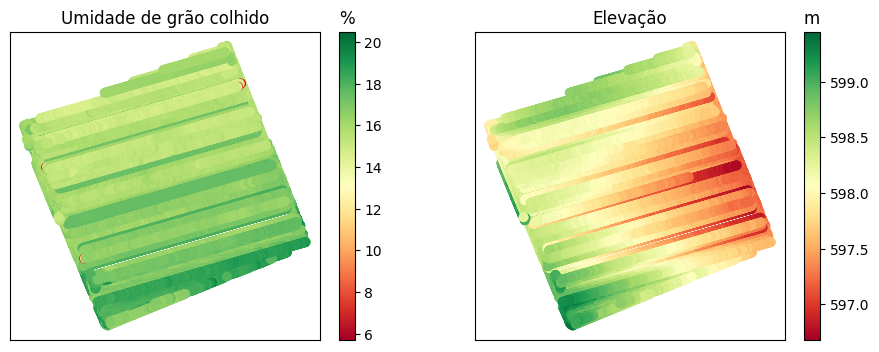

In [44]:
fig, ax = plt.subplots(1,2, figsize=(11,4))
f1=ax[0].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['Umidade'], cmap='RdYlGn')
ax[0].set(title='Umidade de grão colhido')
ax[0].set_xticks([]) # Omitindo valores (lat/lon) e os ticks dos axis
ax[0].set_yticks([])
clb=fig.colorbar(f1, ax=ax[0])
clb.ax.set_title('%')

f2=ax[1].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['Elevacao'], cmap='RdYlGn')
ax[1].set(title='Elevação')
ax[1].set_xticks([])
ax[1].set_yticks([])
clb=fig.colorbar(f2, ax=ax[1])
clb.ax.set_title('m')
plt.show()

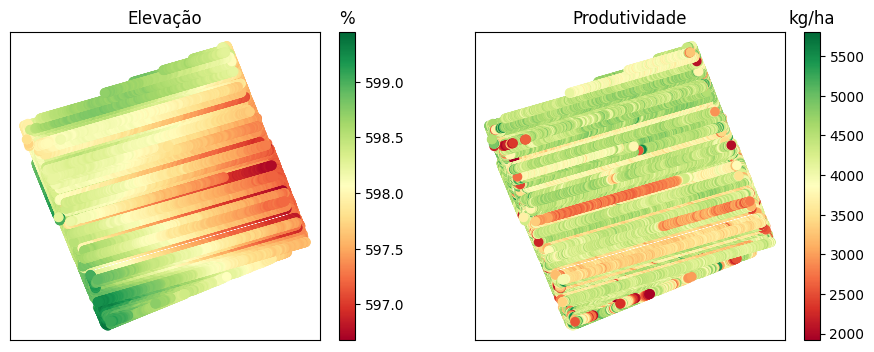

In [45]:
fig, ax = plt.subplots(1,2, figsize=(11,4))
f1=ax[0].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['Elevacao'], cmap='RdYlGn')
ax[0].set(title='Elevação')
ax[0].set_xticks([]) 
ax[0].set_yticks([])
clb=fig.colorbar(f1, ax=ax[0])
clb.ax.set_title('%')

f2=ax[1].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['Rendimentoseco'], cmap='RdYlGn')
ax[1].set(title='Produtividade')
ax[1].set_xticks([])
ax[1].set_yticks([])
clb=fig.colorbar(f2, ax=ax[1])
clb.ax.set_title('kg/ha')
plt.show()

Os gráficos acima, que fornecem uma boa visão da **variabilidade espacial**, não permitem ainda uma interpretação mais detalhada sobre os dados.

Por exemplo, notamos a variação de elevação do talhão (até 2 m, aproximadamente), mas não fica claro que em produtividade, por exemplo, há também uma variabilidade que acompanha a elevação do talhão - o que em diversos casos conseguimos observar, especialmente quando essa variabilidade é maior.

Uma outra visão interessante, antes do uso de Índices Vegetativos (IV), é a avaliação da banda NIR.

Isso porque a banda NIR tem uma forte relação com a vegetação verde e saudável, muitas vezes nos fornecendo resultados muito semelhantes ao do IV de uma lavoura em desenvolvimento.

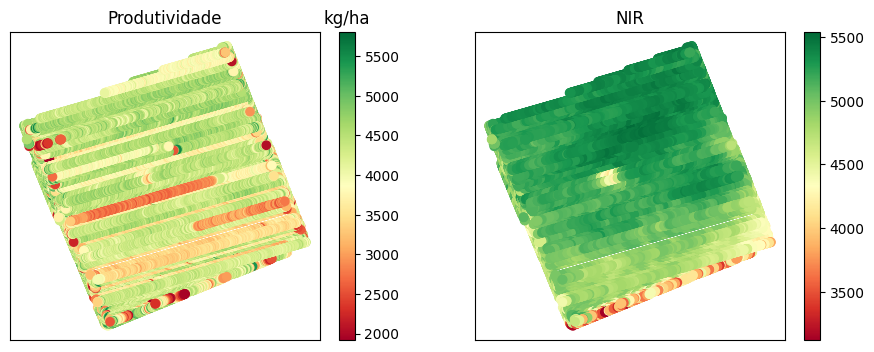

In [47]:
fig, ax = plt.subplots(1,2, figsize=(11,4))
f1=ax[0].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['Rendimentoseco'], cmap='RdYlGn')
ax[0].set(title='Produtividade')
ax[0].set_xticks([]) 
ax[0].set_yticks([])
clb=fig.colorbar(f1, ax=ax[0])
clb.ax.set_title('kg/ha')

f2=ax[1].scatter(x=df_yields['Latitude'], y=df_yields['Longitude'],
                 c=df_yields['B8A'], cmap='RdYlGn')
ax[1].set(title='NIR')
ax[1].set_xticks([])
ax[1].set_yticks([])
clb=fig.colorbar(f2, ax=ax[1])
plt.show()

Não muito conclusivo, porém visualmente podemos "desconfiar" que a parte superior do talhão possui maior média de produtividade, a qual também apresenta maiores valores de reflectância na faixa do NIR.

Essa avaliação foi feita 2 a 2 variáveis, mas pode ser feita com todas as variáveis de uma vez só também.

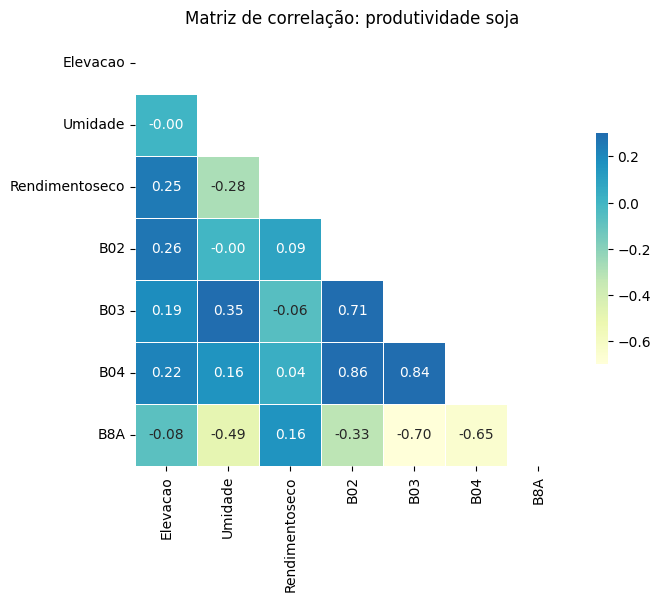

In [57]:
corr =df_yields.iloc[:,2:].corr() # o coeficiente default é pearson, ha outras opcoes
# visual: para termos somente uma das "metades" da matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0, ax=ax,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')
ax.set(title='Matriz de correlação: produtividade soja')
plt.show()

A **correlação** das variáveis com a produtividade não é muito relevante, visto que a correlação mais forte foi encontrada com a banda NIR, mas com valor considerado "fraco", de apenas 0.16.

Caso esteja lidando com seus próprios dados, não desanime. Não deixe os resultados da correlação impedirem outras análises. Tente entender melhor os porques, se possível trazer mais dados que você ache que podem ajudar.

Caso a correlação seja importante para dar suporte a demais análises, considere:

+ Posso tentar obter outras imagens de datas anteriores e posteriores para avaliar como a correlação com produtividade varia?

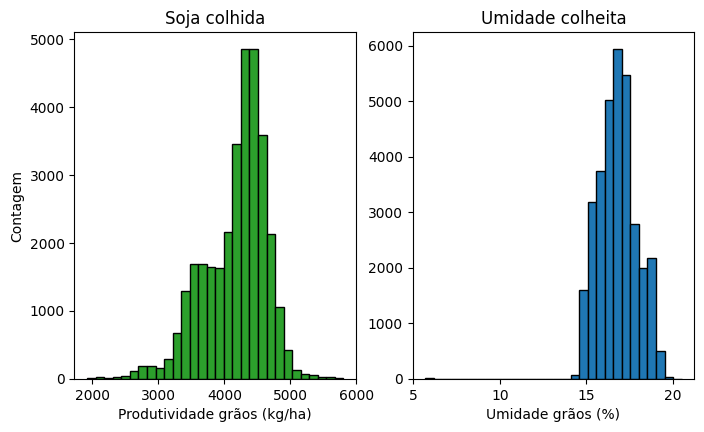

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(8,4.5))

# We can set the number of bins with the *bins* keyword argument.
ax[0].hist(df_yields['Rendimentoseco'], color='tab:green', edgecolor='black', bins=30)
ax[0].set(title='Soja colhida', xlabel='Produtividade grãos (kg/ha)', ylabel='Contagem')
ax[1].hist(df_yields['Umidade'], color='tab:blue', edgecolor='black', bins=30)
ax[1].set(title='Umidade colheita', xlabel='Umidade grãos (%)')
plt.show()

Os histogramas, deixando mais clara a **distribuição e variabilidade** dos dados, dá uma melhor visão sobre o que foi colhido, valores médios, mais frequentes, presença de prováveis outliers.

Nota-se que a produtividade de grãos colhidos mais frequente desse talhão está próximo das 4.5 ton/ha. 
Nota-se também que os grãos foram colhidos na umidade mais frequente de 17%.

+ Essa produtividade média e sua distribuição (e valores mínimos e máximos) está dentro do esperado? Do que se conhece da área? Há algo que chame a atenção por parecer ser não usual?

+ E quanto à umidade dos grãos? Foram colhidos na umidade planejada? Os valores diferem muito do que se amostrou em campo para que fosse feita a operação? Há indicação de alguma necessidade de regulagem/ajuste no processo?

Acima, alguns exemplos de questões que já poderiam estar no planejamento da análise e que surgiram ao explorar os dados.

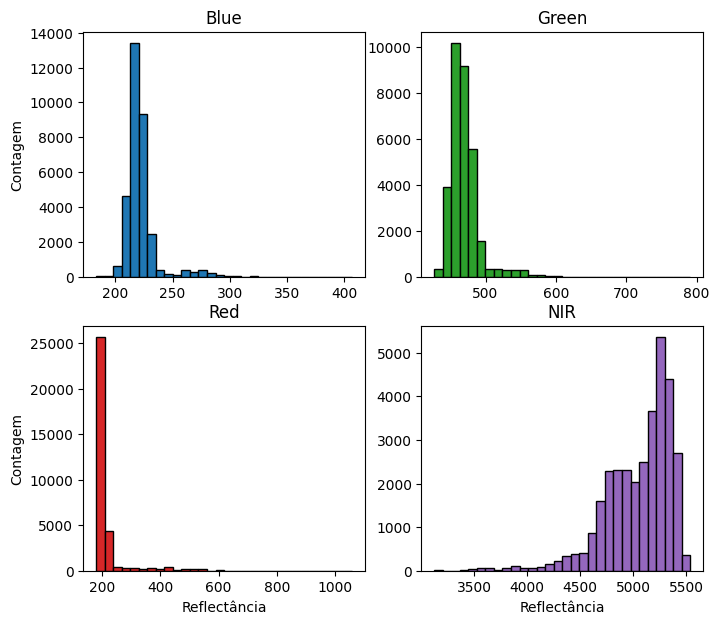

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(8,7))

# We can set the number of bins with the *bins* keyword argument.
ax[0,0].hist(df_yields['B02'], color='tab:blue', edgecolor='black', bins=30)
ax[0,0].set(title='Blue', ylabel='Contagem')
ax[0,1].hist(df_yields['B03'], color='tab:green', edgecolor='black', bins=30)
ax[0,1].set(title='Green')
ax[1,0].hist(df_yields['B04'], color='tab:red', edgecolor='black', bins=30)
ax[1,0].set(title='Red', xlabel='Reflectância', ylabel='Contagem')
ax[1,1].hist(df_yields['B8A'], color='tab:purple', edgecolor='black', bins=30)
ax[1,1].set(title='NIR', xlabel='Reflectância')
plt.show()

Acima, a **variabilidade e distribuição das informações espectrais** de um dado momento do talhão colhido.

Pela época da imagem em relação ao ciclo da cultura, é possível perceber que a vegetação estava apresentando vigor na dada ocasião.
Em termos relativos, maior reflectância na faixa do verde, e absorção (baixa reflectância) nas faixas do vermelho e azul, e mais ampla distribuição de valores correspondentes à faixa do NIR.

Obs: Esses dados podem ser muito melhor explorados e detalhados do que por um simples histograma. O uso de materiais com conceitos e aplicações de Sensoriamento Remoto na vegetação agrícola é muito importante para enriquecer e direcionar as análises.

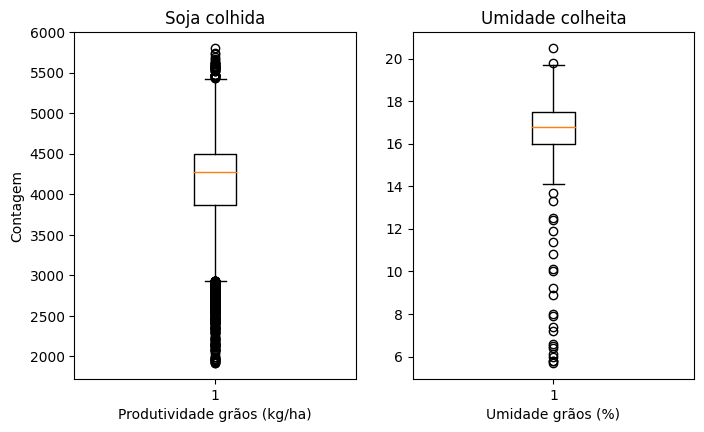

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(8,4.5))

# We can set the number of bins with the *bins* keyword argument.
ax[0].boxplot(df_yields['Rendimentoseco'])
ax[0].set(title='Soja colhida', xlabel='Produtividade grãos (kg/ha)', ylabel='Contagem')
ax[1].boxplot(df_yields['Umidade'])
ax[1].set(title='Umidade colheita', xlabel='Umidade grãos (%)')
plt.show()

E por fim, uma visão complementar sobre a **distribuição e variabilidade** dos dados. Por meio dos boxplots, podemos entender melhor se há valores pouco prováveis, outliers.

Com relação à umidade, vemos que há intensa variabilidade nos valores dos grãos colhidos. É comum em grandes áreas que observe-se tal heterogeneidade, pois dificilmente os talhões têm completa uniformidade no produto a ser colhido.

Com relação à produtividade, sabemos que mapas de colheita apresentam intensa variabilidade, mesmo que já tenham passado por algum tipo de limpeza/filtro. Os talhões, quanto maiores, mais heterogêneos em termos de solo, e consequentemente de umidade, nutrientes, matéria orgânica, ocorrências fitossanitárias etc e que por fim resultam em certa variabilidade na distribuição do produto colhido.

## Referências

+ [seaborn](https://seaborn.pydata.org/index.html)

+ [matplotlib](https://matplotlib.org/stable/index.html)